In [1]:
# similar to 11-6, but clean up maintenance information

import pandas as pd
import seaborn as sns
import numpy as np
import linearmodels as lm
import matplotlib
import math
import statsmodels.formula.api as smf
import statsmodels.api as sm

from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
from linearmodels.panel import FirstDifferenceOLS
from linearmodels.panel import compare
from matplotlib import pyplot as plt

from pandas.api.types import is_numeric_dtype


pd.set_option('display.max_columns', 500)

%matplotlib inline

In [2]:
df=pd.read_csv('final_estimation_file_apta_added_greg2.csv',
                    encoding='utf-8')
df.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
len(df)

4244

In [4]:
tsd_data=pd.read_csv('tsd_pop_employment.csv',
                    encoding='utf-8')
tsd_data.drop(columns=['Unnamed: 0','CBSA Title'],inplace=True)
tsd_data = tsd_data.groupby(['CBSA Code','Year']).sum().reset_index()
tsd_data.head()

,CBSA Code,Year,TOTAL_JOBS_WA_TRACTS,JOBS_LESS_THAN_1250_WA_TRACTS,JOBS_1250_3333_WA_TRACTS,JOBS_MORE_THAN_3333_WA_TRACTS,JOBS_WHITE_ALONE_WA_TRACTS,JOBS_BLACK_ALONE_WA_TRACTS,JOBS_HISPANIC_LATINO_WA_TRACTS,JOBS_LESS_THAN_40K_WA_TRACTS,JOBS_NON_WHITE_WA_TRACTS,JOBS_UPTO_HIGH_SCHOOL_WA_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TRACTS,TOTAL_JOBS_WA_TSD_TRACTS,JOBS_LESS_THAN_1250_WA_TSD_TRACTS,JOBS_1250_3333_WA_TSD_TRACTS,JOBS_MORE_THAN_3333_WA_TSD_TRACTS,JOBS_WHITE_ALONE_WA_TSD_TRACTS,JOBS_BLACK_ALONE_WA_TSD_TRACTS,JOBS_HISPANIC_LATINO_WA_TSD_TRACTS,JOBS_LESS_THAN_40K_WA_TSD_TRACTS,JOBS_NON_WHITE_WA_TSD_TRACTS,JOBS_UPTO_HIGH_SCHHOL_WA_TSD_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TSD_TRACTS,TOTAL_JOBS_RA_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TRACTS,TOTAL_JOBS_OVER_3333_RA_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TRACTS,AREA_ACRE,TOTAL_JOBS_RA_TSD_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS,TOTAL_JOBS_OVER_3333_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TSD_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TSD_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TSD_TRACTS
0,10180,2002,57166.0,22735.0,25452.0,8979.0,0.0,0.0,0.0,48187.0,57166.0,0.0,0.0,9489.0,4531.0,3582.0,1376.0,0.0,0.0,0.0,8113.0,9489.0,0.0,0.0,58397.0,0.0,0.0,0.0,23086.0,25800.0,9511.0,48886.0,58397.0,0.0,0.0,1216.0,2355.0,0.0,0.0,0.0,954.0,1065.0,336.0,2019.0,2355.0,0.0,0.0
1,10180,2003,56917.0,21970.0,25046.0,9901.0,0.0,0.0,0.0,47016.0,56917.0,0.0,0.0,9484.0,4402.0,3471.0,1611.0,0.0,0.0,0.0,7873.0,9484.0,0.0,0.0,57221.0,0.0,0.0,0.0,22049.0,25074.0,10098.0,47123.0,57221.0,0.0,0.0,1216.0,2462.0,0.0,0.0,0.0,1032.0,1069.0,361.0,2101.0,2462.0,0.0,0.0
2,10180,2004,59025.0,22123.0,26375.0,10527.0,0.0,0.0,0.0,48498.0,59025.0,0.0,0.0,9599.0,4443.0,3594.0,1562.0,0.0,0.0,0.0,8037.0,9599.0,0.0,0.0,61419.0,0.0,0.0,0.0,23062.0,27199.0,11158.0,50261.0,61419.0,0.0,0.0,1216.0,2970.0,0.0,0.0,0.0,1231.0,1315.0,424.0,2546.0,2970.0,0.0,0.0
3,10180,2005,57879.0,21202.0,25353.0,11324.0,0.0,0.0,0.0,46555.0,57879.0,0.0,0.0,9645.0,4539.0,3500.0,1606.0,0.0,0.0,0.0,8039.0,9645.0,0.0,0.0,60001.0,0.0,0.0,0.0,21854.0,26081.0,12066.0,47935.0,60001.0,0.0,0.0,1216.0,2938.0,0.0,0.0,0.0,1134.0,1326.0,478.0,2460.0,2938.0,0.0,0.0
4,10180,2006,59588.0,21170.0,25759.0,12659.0,0.0,0.0,0.0,46929.0,59588.0,0.0,0.0,9819.0,4475.0,3516.0,1828.0,0.0,0.0,0.0,7991.0,9819.0,0.0,0.0,62311.0,0.0,0.0,0.0,22008.0,26639.0,13664.0,48647.0,62311.0,0.0,0.0,1216.0,2983.0,0.0,0.0,0.0,1122.0,1342.0,519.0,2464.0,2983.0,0.0,0.0


In [5]:
df=pd.merge(df,tsd_data,left_on=['CBSA','Year'],right_on=['CBSA Code','Year'],how='left')
df=df.drop_duplicates()
df.head()

,CBSA,MNAME,Mode,Year,UPT_ADJUSTED,VRM_ADJUSTED,FARE_ADJUSTED,FARE_per_UPT_cleaned,min_year,max_year,FARE_per_UPT,PROBLEM_FLAG,NOTE,PROBLEM_FLAG2,PROBLEM_FLAG3,Tot_Pop,Tot_Instate_Pop,Tot_Outstate_Pop,Tot_NonUSA_POP,Total_Median_Income_Individual,Native_Instate_Med_Inc_Indiv,Native_Outstate_Med_Inc_Indiv,Native_Outcountry_Med_Inc_Indiv,Total_Pop_Poverty,Pop_Below100_Poverty,Pop_Below150_Poverty,Pop_Above150_Poverty,Age_under18,Age_18to64,Age_over64,Total_HH,HH_0Veh,HH_1Veh,HH_2Veh,HH_3Veh,HH_4+Veh,PCT_HH_NO_VEH,HH_MED_INC,HH_MEAN_INC,INC_U35,INC_35_100,INC_100P,TOT_UNEMP_MSA,TOT_EMP_MSA,TOT_LABOR_MSA,UNEMP_RATE_PCT,EMP_RATE_PCT,GasPrice,Area_acre,POP_CENSUSTRACT,AVG_SPEED,2018_Dollar_Multiplier,TNC_ARRIVAL,Link_x,TNC_FLAG,YEARS_SINCE_TNC,FARE_ADJ_2018,TOTAL_MED_INC_INDIV_2018,NATIVE_INSTATE_MED_INC_2018,NATIVE_OUTSTATE_MED_INC_2018,HH_MED_INC_2018,HH_MEAN_INC_2018,GAS_PRICE_2018,dockCt,docklessCt,scooterCt,PBS_Start,PBS_End,PBS_Flag,Link,walkscore,transit,bike,CLUSTER_GT_NEW_11,CLUSTER_GT_ORIGINAL,CLUSTER_GT_8_GROUPS,CLUSTER_APTA,CLUSTER_NOTE,TOTAL_EMPLOYMENT,JTW_DA_PCT,JTW_CARPOOLED_PCT,JTW_TRANSIT_PCT,JTW_WALK_PCT,JTW_BICYCLE_PCT,JTW_OTHER_PCT,JTW_HOME_PCT,NOTE_JTW,AVG_FARE_2018,WEIGHTED_POP_DENSITY,_merge,CLUSTER_APTA_EXTENDED,Manhattan_Pop,Manhattan_Emp,CBSA Code,TOTAL_JOBS_WA_TRACTS,JOBS_LESS_THAN_1250_WA_TRACTS,JOBS_1250_3333_WA_TRACTS,JOBS_MORE_THAN_3333_WA_TRACTS,JOBS_WHITE_ALONE_WA_TRACTS,JOBS_BLACK_ALONE_WA_TRACTS,JOBS_HISPANIC_LATINO_WA_TRACTS,JOBS_LESS_THAN_40K_WA_TRACTS,JOBS_NON_WHITE_WA_TRACTS,JOBS_UPTO_HIGH_SCHOOL_WA_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TRACTS,TOTAL_JOBS_WA_TSD_TRACTS,JOBS_LESS_THAN_1250_WA_TSD_TRACTS,JOBS_1250_3333_WA_TSD_TRACTS,JOBS_MORE_THAN_3333_WA_TSD_TRACTS,JOBS_WHITE_ALONE_WA_TSD_TRACTS,JOBS_BLACK_ALONE_WA_TSD_TRACTS,JOBS_HISPANIC_LATINO_WA_TSD_TRACTS,JOBS_LESS_THAN_40K_WA_TSD_TRACTS,JOBS_NON_WHITE_WA_TSD_TRACTS,JOBS_UPTO_HIGH_SCHHOL_WA_TSD_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TSD_TRACTS,TOTAL_JOBS_RA_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TRACTS,TOTAL_JOBS_OVER_3333_RA_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TRACTS,AREA_ACRE,TOTAL_JOBS_RA_TSD_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS,TOTAL_JOBS_OVER_3333_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TSD_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TSD_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TSD_TRACTS
0,10420,"Akron, OH Metro Area",Bus,2002,5226386,4026372,596583,0.114148,2002,2018,0.114148,NaN,Bad fare,NaN,1.0,646583.7344,496141.0469,137193.6719,-389.53125,25405.20313,26028.32813,26651.07813,7117.03125,682354.11,7.55,8.94,83.85,24.64,62.9,12.46,265452.20,22830.14,58254.52,117083.25,46891.53,20392.77,8.60,43046.82813,55300.5625,39.49,46.56,13.95,21948.42,346147.17,368095.58,5.96,94.04,1.36,NaN,119786.0,14.88,1.40,2014,http://www.crainscleveland.com/article/2014082...,0,0,4004892.28,35567.28438,36439.65938,37311.50938,60265.55938,77420.7875,1.9040,0,0,0,NaN,NaN,0.0,NaN,0,0,0,1,1,H,24,NaN,309488.2031,87.4,6.2,0.8,1.7,0.1,0.7,3.1,Goes to negative when extrapolating. Possible ...,0.159808,2417.239652,both,24,0,0,10420.0,314749.0,96006.0,131687.0,87056.0,0.0,0.0,0.0,227693.0,314749.0,0.0,0.0,81463.0,23319.0,33326.0,24818.0,0.0,0.0,0.0,56645.0,81463.0,0.0,0.0,305401.0,0.0,0.0,0.0,92556.0,127165.0,85680.0,219721.0,305401.0,0.0,0.0,13619.2,54517.0,0.0,0.0,0.0,18228.0,25397.0,10892.0,43625.0,54517.0,0.0,0.0
1,10420,"Akron, OH Metro Area",Bus,2003,5395902,3976569,2318587,0.429694,2002,2018,0.429694,NaN,NaN,NaN,NaN,659397.0625,504631.8125,137582.3125,753.12500,25120.18750,25632.68750,25995.68750,10350.875,682850.56,8.81,8.66,82.79,24.33,63.0,12.68,269144.1

In [6]:
len(df)

4244

In [7]:
# WAC data derived columns. To account for people coming into the TSD from outlying areas.
df['TSD_WA_EMP_PCT_LEHD']=100*df['TOTAL_JOBS_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TRACTS']
df['TSD_WA_EMP_PCT_CBSA']=100*df['TOTAL_JOBS_WA_TSD_TRACTS']/df['TOT_EMP_MSA']

df['JOBS_LESS_THAN_3333_WA_TRACTS']=df['JOBS_LESS_THAN_1250_WA_TRACTS']+df['JOBS_1250_3333_WA_TRACTS']
df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']=df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']+df['JOBS_1250_3333_WA_TSD_TRACTS']

df['TSD_WA_EMP_WAGE_UNDER_1250']=100*df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TRACTS']
df['TSD_WA_EMP_WAGE_BETN_1250_3333']=100*df['JOBS_1250_3333_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TRACTS']
df['TSD_WA_EMP_WAGE_UNDER_3333']=100*df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TRACTS']

df['TSD_WA_EMP_WAGE_UNDER_1250_PCT_WA']=100*df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']/df['JOBS_LESS_THAN_1250_WA_TRACTS']
df['TSD_WA_EMP_WAGE_BETN_1250_3333_PCT_WA']=100*df['JOBS_1250_3333_WA_TSD_TRACTS']/df['JOBS_1250_3333_WA_TRACTS']
df['TSD_WA_EMP_WAGE_UNDER_3333_PCT_WA']=100*df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']/df['JOBS_LESS_THAN_3333_WA_TRACTS']

df['TSD_WA_EMP_WAGE_UNDER_1250_PCT_TSD']=100*df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TSD_TRACTS']
df['TSD_WA_EMP_WAGE_BETN_1250_3333_PCT_TSD']=100*df['JOBS_1250_3333_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TSD_TRACTS']
df['TSD_WA_EMP_WAGE_UNDER_3333_PCT_TSD']=100*df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TSD_TRACTS']

#RAC data derived columns.

df['TSD_POP_PCT_LEHD']=100*df['TOTAL_JOBS_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TRACTS'] #RAC data
df['TSD_POP_PCT_CBSA']=100*df['TOTAL_JOBS_RA_TSD_TRACTS']/df['Tot_Pop']
df['TSD_POP_WAGE_UNDER_1250']=100*df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TRACTS']
df['TSD_POP_WAGE_BETN_1250_3333']=100*df['TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TRACTS']
df['TSD_POP_WAGE_UNDER_3333']=100*df['TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TRACTS']

df['TSD_POP_WAGE_UNDER_1250_PCT_RA']=100*df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']/df['TOTAL_JOBS_UNDER_1250_RA_TRACTS']
df['TSD_POP_WAGE_BETN_1250_3333_PCT_RA']=100*df['TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_BETN_1250_3333_RA_TRACTS']
df['TSD_POP_WAGE_UNDER_3333_PCT_RA']=100*df['TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_UNDER_3333_RA_TRACTS']

df['TSD_POP_WAGE_UNDER_1250_PCT_TSD']=100*df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TSD_TRACTS']
df['TSD_POP_WAGE_BETN_1250_3333_PCT_TSD']=100*df['TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TSD_TRACTS']
df['TSD_POP_WAGE_UNDER_3333_PCT_TSD']=100*df['TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TSD_TRACTS']


In [8]:
# read updated TNC revenue data
# tnc_rev=pd.read_csv('TNC_REVENUE_3.csv')
# tnc_rev.drop(columns=['Unnamed: 0'],inplace=True)
# tnc_rev=tnc_rev.drop_duplicates(['CBSA','MNAME','Year'])
# tnc_rev.head()

tnc_rev=pd.read_csv('TNC_CBSA_FINAL_2.csv')

tnc_rev.drop(columns=['MNAME','Tot_Pop'],inplace=True)
# tnc_rev=tnc_rev.drop_duplicates(['CBSA','MNAME','Year'])
tnc_rev.head()

,CBSA,Year,TNC_CLUSTER,TOT_POP_CLUSTER,TOTAL_YEARLY_POPULATION,POP_SHARE,TOTAL_TRIPS_PER_CAPITA,TNC_TRIPS_SCALED,TOTAL_TNC_TRIPS_PER_CLUSTER,TRIPS_SCALED,Scale_2,TNC_TRIPS,TNC_TRIPS_PER_CAPITA_CLUSTER
0,10420,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5
1,10740,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5
2,10900,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5
3,11460,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5
4,12420,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5


In [9]:
df=pd.merge(df,tnc_rev,on=['CBSA','Year'],how='left')
df['TNC_TRIPS_PER_CAPITA_CLUSTER']=df['TNC_TRIPS_PER_CAPITA_CLUSTER'].fillna(0)
df.head()

,CBSA,MNAME,Mode,Year,UPT_ADJUSTED,VRM_ADJUSTED,FARE_ADJUSTED,FARE_per_UPT_cleaned,min_year,max_year,FARE_per_UPT,PROBLEM_FLAG,NOTE,PROBLEM_FLAG2,PROBLEM_FLAG3,Tot_Pop,Tot_Instate_Pop,Tot_Outstate_Pop,Tot_NonUSA_POP,Total_Median_Income_Individual,Native_Instate_Med_Inc_Indiv,Native_Outstate_Med_Inc_Indiv,Native_Outcountry_Med_Inc_Indiv,Total_Pop_Poverty,Pop_Below100_Poverty,Pop_Below150_Poverty,Pop_Above150_Poverty,Age_under18,Age_18to64,Age_over64,Total_HH,HH_0Veh,HH_1Veh,HH_2Veh,HH_3Veh,HH_4+Veh,PCT_HH_NO_VEH,HH_MED_INC,HH_MEAN_INC,INC_U35,INC_35_100,INC_100P,TOT_UNEMP_MSA,TOT_EMP_MSA,TOT_LABOR_MSA,UNEMP_RATE_PCT,EMP_RATE_PCT,GasPrice,Area_acre,POP_CENSUSTRACT,AVG_SPEED,2018_Dollar_Multiplier,TNC_ARRIVAL,Link_x,TNC_FLAG,YEARS_SINCE_TNC,FARE_ADJ_2018,TOTAL_MED_INC_INDIV_2018,NATIVE_INSTATE_MED_INC_2018,NATIVE_OUTSTATE_MED_INC_2018,HH_MED_INC_2018,HH_MEAN_INC_2018,GAS_PRICE_2018,dockCt,docklessCt,scooterCt,PBS_Start,PBS_End,PBS_Flag,Link,walkscore,transit,bike,CLUSTER_GT_NEW_11,CLUSTER_GT_ORIGINAL,CLUSTER_GT_8_GROUPS,CLUSTER_APTA,CLUSTER_NOTE,TOTAL_EMPLOYMENT,JTW_DA_PCT,JTW_CARPOOLED_PCT,JTW_TRANSIT_PCT,JTW_WALK_PCT,JTW_BICYCLE_PCT,JTW_OTHER_PCT,JTW_HOME_PCT,NOTE_JTW,AVG_FARE_2018,WEIGHTED_POP_DENSITY,_merge,CLUSTER_APTA_EXTENDED,Manhattan_Pop,Manhattan_Emp,CBSA Code,TOTAL_JOBS_WA_TRACTS,JOBS_LESS_THAN_1250_WA_TRACTS,JOBS_1250_3333_WA_TRACTS,JOBS_MORE_THAN_3333_WA_TRACTS,JOBS_WHITE_ALONE_WA_TRACTS,JOBS_BLACK_ALONE_WA_TRACTS,JOBS_HISPANIC_LATINO_WA_TRACTS,JOBS_LESS_THAN_40K_WA_TRACTS,JOBS_NON_WHITE_WA_TRACTS,JOBS_UPTO_HIGH_SCHOOL_WA_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TRACTS,TOTAL_JOBS_WA_TSD_TRACTS,JOBS_LESS_THAN_1250_WA_TSD_TRACTS,JOBS_1250_3333_WA_TSD_TRACTS,JOBS_MORE_THAN_3333_WA_TSD_TRACTS,JOBS_WHITE_ALONE_WA_TSD_TRACTS,JOBS_BLACK_ALONE_WA_TSD_TRACTS,JOBS_HISPANIC_LATINO_WA_TSD_TRACTS,JOBS_LESS_THAN_40K_WA_TSD_TRACTS,JOBS_NON_WHITE_WA_TSD_TRACTS,JOBS_UPTO_HIGH_SCHHOL_WA_TSD_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TSD_TRACTS,TOTAL_JOBS_RA_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TRACTS,TOTAL_JOBS_OVER_3333_RA_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TRACTS,AREA_ACRE,TOTAL_JOBS_RA_TSD_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS,TOTAL_JOBS_OVER_3333_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TSD_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TSD_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TSD_TRACTS,TSD_WA_EMP_PCT_LEHD,TSD_WA_EMP_PCT_CBSA,JOBS_LESS_THAN_3333_WA_TRACTS,JOBS_LESS_THAN_3333_WA_TSD_TRACTS,TSD_WA_EMP_WAGE_UNDER_1250,TSD_WA_EMP_WAGE_BETN_1250_3333,TSD_WA_EMP_WAGE_UNDER_3333,TSD_WA_EMP_WAGE_UNDER_1250_PCT_WA,TSD_WA_EMP_WAGE_BETN_1250_3333_PCT_WA,TSD_WA_EMP_WAGE_UNDER_3333_PCT_WA,TSD_WA_EMP_WAGE_UNDER_1250_PCT_TSD,TSD_WA_EMP_WAGE_BETN_1250_3333_PCT_TSD,TSD_WA_EMP_WAGE_UNDER_3333_PCT_TSD,TSD_POP_PCT_LEHD,TSD_POP_PCT_CBSA,TSD_POP_WAGE_UNDER_1250,TSD_POP_WAGE_BETN_1250_3333,TSD_POP_WAGE_UNDER_3333,TSD_POP_WAGE_UNDER_1250_PCT_RA,TSD_POP_WAGE_BETN_1250_3333_PCT_RA,TSD_POP_WAGE_UNDER_3333_PCT_RA,TSD_POP_WAGE_UNDER_1250_PCT_TSD,TSD_POP_WAGE_BETN_1250_3333_PCT_TSD,TSD_POP_WAGE_UNDER_3333_PCT_TSD,TNC_CLUSTER,TOT_POP_CLUSTER,TOTAL_YEARLY_POPULATION,POP_SHARE,TOTAL_TRIPS_PER_CAPITA,TNC_TRIPS_SCALED,TOTAL_TNC_TRIPS_PER_CLUSTER,TRIPS_SCALED,Scale_2,TNC_TRIPS,TNC_TRIPS_PER_CAPITA_CLUSTER
0,10420,"Akron, OH Metro Area",Bus,2002,5226386,4026372,596583,0.114148,2002,2018,0.114148,NaN,Bad fare,NaN,1.0,646583.7344,496141.0469,137193.6719,-389.53125,25405.20313,26028.32813,26651.07813,7117.03125,682354.11,7.55,8.94,83.85,24.64,62.9,12.46,265452.20,22830.14,58254.52,117083.25,46891.53,20392.77,8.60,43046.82813,55300.5625,39.49,46.56,13.95,21948.42,346147.

In [10]:
df['TNC_TRIPS_PER_CAPITA_CLUSTER']=df['TNC_TRIPS_PER_CAPITA_CLUSTER'].astype(float)
df['TNC_TRIPS_PER_CAPITA_CLUSTER'].describe()

count    4244.000000
mean        0.714656
std         1.857022
min         0.000000
25%         0.000000
50%         0.000000
75%         0.700000
max        30.400000
Name: TNC_TRIPS_PER_CAPITA_CLUSTER, dtype: float64

In [11]:
# read in and join the maintenance and restructure data
mr=pd.read_csv('maintenance_restructure.csv',
                    encoding='utf-8')
mr = mr[['CBSA', 'Mode', 'Year', 'MAINTENANCE', 'MAINTENANCE_NYC', 'MAINTENANCE_WMATA', 'RESTRUCTURE']]

df = df.merge(mr, on=['CBSA', 'Mode', 'Year'], how='left')

In [12]:
len(df)

4244

In [13]:
# read in mechanical and other failures

failures=pd.read_csv('maintenance_final_greg.csv',encoding='utf-8')
failures.drop(columns=['Unnamed: 0'],inplace=True)

failures = failures.groupby(['CBSA','MNAME','Mode','Year']).sum().reset_index()

In [14]:
df=df.merge(failures, on=['CBSA','MNAME','Mode','Year'],how='left')
df=df.rename(columns={'UPT_ADJUSTED':'UPT_ADJ','VRM_ADJUSTED':'VRM_ADJ','FARE_ADJUSTED':'FARE_ADJ','AVG_FARE_2018':'FARE_per_UPT_2018',
                     'Mecha_Failures':'Mechanical_Failures'})

In [15]:
df['Mechanical_Failures']=df['Mechanical_Failures'].fillna(0)
df['Total_Failures']=df['Total_Failures'].fillna(0)
df['MDBF_Mechanical']=np.where(df['Mechanical_Failures']>0,df['VRM_ADJ']/df['Mechanical_Failures'],df['VRM_ADJ'])
df['MDBF_Total']=np.where(df['Total_Failures']>0,df['VRM_ADJ']/df['Total_Failures'],df['VRM_ADJ'])

In [16]:
# read in and join the bike share updates
bsu=pd.read_csv('bike_share_update.csv',
                    encoding='utf-8')
bsu = bsu[['CBSA', 'Mode', 'Year', 'PBS_Flag_Update']]

df = df.merge(bsu, on=['CBSA', 'Mode', 'Year'], how='left')

#df['PBS_Flag_Missing'] = df['PBS_Flag'].apply(lambda x : x.isnan())
df['PBS_Flag'] = np.where(df['PBS_Flag'].isnull(), df['PBS_Flag_Update'], df['PBS_Flag'])

In [17]:
# 4 apta clusers
df['CLUSTER_APTA4'] = np.floor(df['CLUSTER_APTA']/10)

In [18]:
# exclude if ridership is zero--missing data
df = df[df['UPT_ADJ']>0]

In [19]:
# fill in missing data as needed

# min fare is zero
df['FARE_per_UPT_2018'] = df['FARE_per_UPT_2018'].apply(lambda x : max(x,0))

# max fare is $20
df['FARE_per_UPT_2018'] = df['FARE_per_UPT_2018'].apply(lambda x : min(x,20))

# zero vehicle HH can't go negative
df['HH_0Veh'] = df['HH_0Veh'].apply(lambda x : max(x,0))

In [20]:
df=df.drop_duplicates(['CBSA','Mode','Year'])

In [21]:
# convert JTW to numeric columns
df['JTW_DA_PCT']        = df['JTW_DA_PCT'].replace('#VALUE!', np.nan)
df['JTW_CARPOOLED_PCT'] = df['JTW_CARPOOLED_PCT'].replace('#VALUE!', np.nan)
df['JTW_TRANSIT_PCT']   = df['JTW_TRANSIT_PCT'].replace('#VALUE!', np.nan)
df['JTW_WALK_PCT']      = df['JTW_WALK_PCT'].replace('#VALUE!', np.nan)
df['JTW_BICYCLE_PCT']   = df['JTW_BICYCLE_PCT'].replace('#VALUE!', np.nan)
df['JTW_OTHER_PCT']     = df['JTW_OTHER_PCT'].replace('#VALUE!', np.nan)
df['JTW_HOME_PCT']      = df['JTW_HOME_PCT'].replace('#VALUE!', np.nan)


df['JTW_DA_PCT']        = df['JTW_DA_PCT'].replace('N', np.nan)
df['JTW_CARPOOLED_PCT'] = df['JTW_CARPOOLED_PCT'].replace('N', np.nan)
df['JTW_TRANSIT_PCT']   = df['JTW_TRANSIT_PCT'].replace('N', np.nan)
df['JTW_WALK_PCT']      = df['JTW_WALK_PCT'].replace('N', np.nan)
df['JTW_BICYCLE_PCT']   = df['JTW_BICYCLE_PCT'].replace('N', np.nan)
df['JTW_OTHER_PCT']     = df['JTW_OTHER_PCT'].replace('N', np.nan)
df['JTW_HOME_PCT']      = df['JTW_HOME_PCT'].replace('N', np.nan)



In [22]:
# convert JTW to numeric columns
df['JTW_DA_PCT']        = df['JTW_DA_PCT'].astype(float)
df['JTW_CARPOOLED_PCT'] = df['JTW_CARPOOLED_PCT'].astype(float)
df['JTW_TRANSIT_PCT']   = df['JTW_TRANSIT_PCT'].astype(float)
df['JTW_WALK_PCT']      = df['JTW_WALK_PCT'].astype(float)
df['JTW_BICYCLE_PCT']   = df['JTW_BICYCLE_PCT'].astype(float)
df['JTW_OTHER_PCT']     = df['JTW_OTHER_PCT'].astype(float)
df['JTW_HOME_PCT']      = df['JTW_HOME_PCT'].astype(float)

In [23]:
# exclude problematic data
old_len = len(df)
df = df[df['VRM_ADJ']>0]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records with missing VRM') 

# exclude if JTW data are missing
old_len = len(df)
df = df[df['JTW_HOME_PCT']>=0]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records with missing JTW data') 

# exclude if problem flag 3 is set
old_len = len(df)
df = df[df['PROBLEM_FLAG3']!=1]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records with problem flag set to 1') 

# exclude rail in low op-ex group
old_len = len(df)
df['LOW_OPEX'] = np.where(df['CLUSTER_APTA4']==3, 1, 0)
df['RAIL_FLAG'] = np.where(df['Mode']=='Rail', 1, 0)
df['LOW_OPEX_RAIL'] = df['LOW_OPEX'] * df['RAIL_FLAG']
df = df[df['LOW_OPEX_RAIL']==0]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records with that have rail in the low op-ex group') 

# exclude bad maintenance data
#old_len = len(df)
#df = df[df['MDBF_Exclude']==0]
#new_len = len(df)
#print('Excluding ' + str(old_len-new_len) + ' records with unreported maintance data') 


Excluding 1 records with missing VRM
Excluding 25 records with missing JTW data
Excluding 175 records with problem flag set to 1
Excluding 48 records with that have rail in the low op-ex group


In [24]:
# exclude discontinuous data
df = df.sort_values(by=['CBSA', 'Mode', 'Year'])

excluded_records = 100
while excluded_records > 0: 
    old_len = len(df)
    df['YearDiff'] = df['Year'].shift(-1) - df['Year']
    df = df[(df['YearDiff']==1) | (df['Year']==2018)]
    excluded_records = old_len - len(df)
    print('Excluding ' + str(excluded_records) + ' records with discontinuities in year.') 




Excluding 21 records with discontinuities in year.
Excluding 18 records with discontinuities in year.
Excluding 15 records with discontinuities in year.
Excluding 14 records with discontinuities in year.
Excluding 13 records with discontinuities in year.
Excluding 12 records with discontinuities in year.
Excluding 11 records with discontinuities in year.
Excluding 8 records with discontinuities in year.
Excluding 7 records with discontinuities in year.
Excluding 7 records with discontinuities in year.
Excluding 6 records with discontinuities in year.
Excluding 5 records with discontinuities in year.
Excluding 4 records with discontinuities in year.
Excluding 3 records with discontinuities in year.
Excluding 1 records with discontinuities in year.
Excluding 1 records with discontinuities in year.
Excluding 0 records with discontinuities in year.


In [25]:
# set the indices
df['ID'] = df['MNAME'] + '-' + df['Mode']
df['ID2'] = df['ID']
df['YEAR2'] = df['Year']
df=df.set_index(['ID','Year'])

# exclude if it is not in operation at least since 2012
ids = df.index.get_level_values(0).unique()

for id in ids: 
    years = df.loc[id].index.get_level_values(0).sort_values()
    first_year = years[0]
    
    for year in years: 
        df.loc[(id,year),'FIRST_YEAR'] = first_year
        
df = df.reset_index()

# excldue where not in operation since at least 2012
old_len = len(df)
df = df[df['FIRST_YEAR']<=2012]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records starting operation later than 2012') 



Excluding 32 records starting operation later than 2012


In [26]:
df['BUS_FLAG'] = np.where(df['Mode']=='Bus', 1, 0)
df['RAIL_FLAG'] = np.where(df['Mode']=='Rail', 1, 0)

In [27]:
# include population + employment
df['POP_EMP'] = df['Tot_Pop'] + df['TOT_EMP_MSA']
df['HH_EMP'] = df['Total_HH'] + df['TOT_EMP_MSA']


# percent of pop born outside USA
df['Tot_NonUSA_POP_pct'] = df['Tot_NonUSA_POP'] / df['Tot_Pop'] * 100

In [28]:
df.to_csv('merged_estfile.csv')

In [29]:
# time effects
df['YEARS_SINCE_2002']  = df['Year'] - 2002

df['YEARS_2002_2010']  = df['Year'].apply(lambda x : min(x-2002, 8))
df['YEARS_AFTER_2010'] = df['Year'].apply(lambda x : max(x-2010, 0))

df['YEARS_2002_2014']  = df['Year'].apply(lambda x : min(x-2002, 12))
df['YEARS_AFTER_2014'] = df['Year'].apply(lambda x : max(x-2014, 0))


df['YEARS_SINCE_2002_BUS']  = df['YEARS_SINCE_2002'] * df['BUS_FLAG']
df['YEARS_SINCE_2002_RAIL'] = df['YEARS_SINCE_2002'] * df['RAIL_FLAG']

df['YEARS_2002_2010_BUS']   = df['YEARS_2002_2010'] * df['BUS_FLAG']
df['YEARS_AFTER_2010_BUS']  = df['YEARS_AFTER_2010']* df['BUS_FLAG']
df['YEARS_2002_2010_RAIL']  = df['YEARS_2002_2010'] * df['RAIL_FLAG']
df['YEARS_AFTER_2010_RAIL'] = df['YEARS_AFTER_2010']* df['RAIL_FLAG']

df['YEARS_2002_2014_BUS']   = df['YEARS_2002_2014'] * df['BUS_FLAG']
df['YEARS_AFTER_2014_BUS']  = df['YEARS_AFTER_2014']* df['BUS_FLAG']
df['YEARS_2002_2014_RAIL']  = df['YEARS_2002_2014'] * df['RAIL_FLAG']
df['YEARS_AFTER_2014_RAIL'] = df['YEARS_AFTER_2014']* df['RAIL_FLAG']

In [30]:
# more time effects

df['YEARS_AFTER_2012'] = df['Year'].apply(lambda x : max(x-2012, 0))

df['TNC_YEARS_AFTER_2012'] = df['YEARS_AFTER_2012'] * df['TNC_FLAG']

df['TNC_YEARS_AFTER_2012_BUS'] = df['TNC_YEARS_AFTER_2012'] * df['BUS_FLAG']
df['TNC_YEARS_AFTER_2012_RAIL'] = df['TNC_YEARS_AFTER_2012'] * df['RAIL_FLAG']

In [31]:

df['YEARS_SINCE_TNC_2012'] = np.minimum(df['YEARS_SINCE_TNC'], df['YEARS_AFTER_2012'])

df['YEARS_SINCE_TNC_2012_BUS'] = df['YEARS_SINCE_TNC_2012'] * df['BUS_FLAG']
df['YEARS_SINCE_TNC_2012_RAIL'] = df['YEARS_SINCE_TNC_2012'] * df['RAIL_FLAG']

In [32]:
# test rail ramp up period
df['YEARS_SINCE_RAIL_START'] = (df['Year'] - df['min_year']) * df['RAIL_FLAG']
df['YEARS_SINCE_RAIL_START'] = np.where(df['min_year']==2002, 0, df['YEARS_SINCE_RAIL_START'])

df['YEARS_SINCE_RAIL_START_1'] = df['YEARS_SINCE_RAIL_START'].apply(lambda x : min(x, 1))
df['YEARS_SINCE_RAIL_START_2'] = df['YEARS_SINCE_RAIL_START'].apply(lambda x : min(x, 2))
df['YEARS_SINCE_RAIL_START_3'] = df['YEARS_SINCE_RAIL_START'].apply(lambda x : min(x, 3))



In [33]:
# calculate bus vs rail stuff

# various bus/rail specifics

df['TNC_FLAG_BUS'] = df['TNC_FLAG'] * df['BUS_FLAG']
df['TNC_FLAG_RAIL'] = df['TNC_FLAG'] * df['RAIL_FLAG']

df['YEARS_SINCE_TNC_BUS'] = df['YEARS_SINCE_TNC'] * df['BUS_FLAG']
df['YEARS_SINCE_TNC_RAIL'] = df['YEARS_SINCE_TNC'] * df['RAIL_FLAG']

df['dockless_flag'] = df['dockCt'].apply(lambda x : min(x,1))
df['scooter_flag']  = df['scooterCt'].apply(lambda x : min(x,1))

df['BIKE_SHARE'] = df['PBS_Flag'] + df['dockless_flag']
df['BIKE_SHARE'] = df['BIKE_SHARE'].apply(lambda x : min(x,1))


df['PBS_Flag_BUS']   = df['PBS_Flag']   * df['BUS_FLAG']
df['dockCt_BUS']     = df['dockCt']     * df['BUS_FLAG']
df['docklessCt_BUS'] = df['docklessCt'] * df['BUS_FLAG']
df['scooterCt_BUS']  = df['scooterCt']  * df['BUS_FLAG']
df['dockless_flag_BUS'] = df['dockless_flag'] * df['BUS_FLAG']
df['scooter_flag_BUS']  = df['scooter_flag']  * df['BUS_FLAG']
df['BIKE_SHARE_BUS']  = df['BIKE_SHARE']  * df['BUS_FLAG']


df['PBS_Flag_RAIL']   = df['PBS_Flag']   * df['RAIL_FLAG']
df['dockCt_RAIL']     = df['dockCt']     * df['RAIL_FLAG']
df['docklessCt_RAIL'] = df['docklessCt'] * df['RAIL_FLAG']
df['scooterCt_RAIL']  = df['scooterCt']  * df['RAIL_FLAG']
df['dockless_flag_RAIL'] = df['dockless_flag'] * df['RAIL_FLAG']
df['scooter_flag_RAIL']  = df['scooter_flag']  * df['RAIL_FLAG']
df['BIKE_SHARE_RAIL']  = df['BIKE_SHARE']  * df['RAIL_FLAG']

In [34]:
# immigrant population percentage
df['Tot_NonUSA_POP_pct'] = df['Tot_NonUSA_POP'] / df['Tot_Pop'] * 100

In [35]:
# bike share plus scooters for rail
df['BIKE_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL']

# different spec of bike and scooter
df['BIKE_SCOOTER_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL'] + df['scooter_flag_RAIL']

# different spec of bike and scooter
df['BIKE_SCOOTER_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL'] + df['scooter_flag_RAIL']

# merge bike and scooter for bus
df['BIKE_SCOOTER_SCOOTER_BUS'] = df['BIKE_SHARE_BUS'] + df['scooter_flag_BUS'] + df['scooter_flag_BUS']

# merge bike and scooter for bus
df['BIKE_SCOOTER_BUS'] = df['BIKE_SHARE_BUS'] + df['scooter_flag_BUS'] 
df['BIKE_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL'] 

# scooter or bike
df['BIKE_OR_SCOOTER_BUS']  = df['BIKE_SHARE_BUS'] + df['scooter_flag_BUS'] 
df['BIKE_OR_SCOOTER_BUS']  = df['BIKE_OR_SCOOTER_BUS'].apply(lambda x : min(x, 1))

df['BIKE_OR_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL'] 
df['BIKE_OR_SCOOTER_RAIL'] = df['BIKE_OR_SCOOTER_RAIL'].apply(lambda x : min(x, 1))

# calculate average vehicles
df['AVG_VEHS'] = (df['HH_1Veh'] + 2*df['HH_2Veh'] + 3*df['HH_3Veh'] + 4*df['HH_4+Veh']) / (df['HH_0Veh'] + df['HH_1Veh'] + df['HH_2Veh'] + df['HH_3Veh'] + df['HH_4+Veh'])
df['AVG_VEHS_log'] = np.log(1+df['AVG_VEHS'])

In [36]:
# walk bike other commuting
df['JTW_WALK_BIKE_OTHER_PCT'] = df['JTW_WALK_PCT'] + df['JTW_BICYCLE_PCT'] + df['JTW_OTHER_PCT']

# walk bike commuting
df['JTW_WALK_BIKE_PCT'] = df['JTW_WALK_PCT'] + df['JTW_BICYCLE_PCT']

In [37]:
df['VRM_ADJ_BUS'] = df['VRM_ADJ'] * df['BUS_FLAG']
df['VRM_ADJ_RAIL'] = df['VRM_ADJ'] * df['RAIL_FLAG']


#maintenance effect on competing mode
df['MDBF_Mechanical_RAIL']  = df['MDBF_Mechanical'] * df['RAIL_FLAG']
df['MDBF_Mechanical_BUS'] = df['MDBF_Mechanical']  * df['BUS_FLAG']

df['MDBF_Total_RAIL']  = df['MDBF_Total'] * df['RAIL_FLAG']
df['MDBF_Total_BUS'] = df['MDBF_Total']  * df['BUS_FLAG']

In [38]:
# segment TNCs by cluster
df['HI_OPEX']  = np.where(df['CLUSTER_APTA4']==1, 1, 0)
df['MID_OPEX'] = np.where(df['CLUSTER_APTA4']==2, 1, 0)
df['LOW_OPEX'] = np.where(df['CLUSTER_APTA4']==3, 1, 0)
df['NEW_YORK'] = np.where(df['CLUSTER_APTA4']==10, 1, 0)

df['YEARS_SINCE_TNC_BUS_HI']  = df['YEARS_SINCE_TNC_BUS'] * df['HI_OPEX']
df['YEARS_SINCE_TNC_BUS_MID'] = df['YEARS_SINCE_TNC_BUS'] * df['MID_OPEX']
df['YEARS_SINCE_TNC_BUS_LOW'] = df['YEARS_SINCE_TNC_BUS'] * df['LOW_OPEX']
df['YEARS_SINCE_TNC_BUS_NY']  = df['YEARS_SINCE_TNC_BUS'] * df['NEW_YORK']

df['YEARS_SINCE_TNC_RAIL_HI']  = df['YEARS_SINCE_TNC_RAIL'] * df['HI_OPEX']
df['YEARS_SINCE_TNC_RAIL_MID'] = df['YEARS_SINCE_TNC_RAIL'] * df['MID_OPEX']
df['YEARS_SINCE_TNC_RAIL_LOW'] = df['YEARS_SINCE_TNC_RAIL'] * df['LOW_OPEX']
df['YEARS_SINCE_TNC_RAIL_NY']  = df['YEARS_SINCE_TNC_RAIL'] * df['NEW_YORK']

df['YEARS_SINCE_TNC_BUS_HINY']  = df['YEARS_SINCE_TNC_BUS_HI'] + df['YEARS_SINCE_TNC_BUS_NY']
df['YEARS_SINCE_TNC_RAIL_HINY']  = df['YEARS_SINCE_TNC_RAIL_HI'] + df['YEARS_SINCE_TNC_RAIL_NY']

df['YEARS_SINCE_TNC_BUS_MIDLOW']  = df['YEARS_SINCE_TNC_BUS_MID'] + df['YEARS_SINCE_TNC_BUS_LOW']
df['YEARS_SINCE_TNC_RAIL_MIDLOW']  = df['YEARS_SINCE_TNC_RAIL_MID'] + df['YEARS_SINCE_TNC_RAIL_LOW']

In [39]:
# bikes and scooters by segment

df['BIKE_SHARE_HI']  = df['BIKE_SHARE'] * df['HI_OPEX']
df['BIKE_SHARE_MID'] = df['BIKE_SHARE'] * df['MID_OPEX']
df['BIKE_SHARE_LOW'] = df['BIKE_SHARE'] * df['LOW_OPEX']
df['BIKE_SHARE_NY']  = df['BIKE_SHARE'] * df['NEW_YORK']

df['scooter_flag_HI']  = df['scooter_flag'] * df['HI_OPEX']
df['scooter_flag_MID'] = df['scooter_flag'] * df['MID_OPEX']
df['scooter_flag_LOW'] = df['scooter_flag'] * df['LOW_OPEX']
df['scooter_flag_NY']  = df['scooter_flag'] * df['NEW_YORK']


df['BIKE_SHARE_HINY']  = df['BIKE_SHARE_HI'] + df['BIKE_SHARE_NY']
df['BIKE_SHARE_MIDLOW']  = df['BIKE_SHARE_MID'] + df['BIKE_SHARE_LOW']

df['scooter_flag_HINY']  = df['scooter_flag_HI'] + df['scooter_flag_NY']
df['scooter_flag_MIDLOW']  = df['scooter_flag_MID'] + df['scooter_flag_LOW']

In [40]:
# tnc_rev=pd.read_csv('tnc_revenue.csv',encoding='utf-8')
# tnc_rev.head()

In [41]:
# tnc_rev.drop(columns=['Unnamed: 0'],inplace=True)

In [42]:
# df=pd.merge(df,tnc_rev,on=['CBSA',
#  'MNAME',
#  'Mode',
#  'Year',
#  'TNC_FLAG',
#  'YEARS_SINCE_TNC'],how='left')
# df.head()

In [43]:
# df['UBER_NET_REVENUE']=df['UBER_NET_REVENUE'].fillna(0)
# df['UBER_REV_SCALED']=df['UBER_REV_SCALED'].fillna(0)
# df.head(20)

In [44]:
# df['UBER_REV_SCALED_BUS'] = df['UBER_REV_SCALED'] * df['BUS_FLAG']
# df['UBER_REV_SCALED_RAIL'] = df['UBER_REV_SCALED'] * df['RAIL_FLAG']

# df['UBER_REV_SCALED_BUS_HI']  = df['UBER_REV_SCALED_BUS'] * df['HI_OPEX']
# df['UBER_REV_SCALED_BUS_MID'] = df['UBER_REV_SCALED_BUS'] * df['MID_OPEX']
# df['UBER_REV_SCALED_BUS_LOW'] = df['UBER_REV_SCALED_BUS'] * df['LOW_OPEX']
# df['UBER_REV_SCALED_BUS_NY']  = df['UBER_REV_SCALED_BUS'] * df['NEW_YORK']

# df['UBER_REV_SCALED_RAIL_HI']  = df['UBER_REV_SCALED_RAIL'] * df['HI_OPEX']
# df['UBER_REV_SCALED_RAIL_MID'] = df['UBER_REV_SCALED_RAIL'] * df['MID_OPEX']
# df['UBER_REV_SCALED_RAIL_LOW'] = df['UBER_REV_SCALED_RAIL'] * df['LOW_OPEX']
# df['UBER_REV_SCALED_RAIL_NY']  = df['UBER_REV_SCALED_RAIL'] * df['NEW_YORK']

# df['UBER_REV_SCALED_BUS_HINY']  = df['UBER_REV_SCALED_BUS_HI'] + df['UBER_REV_SCALED_BUS_NY']
# df['UBER_REV_SCALED_RAIL_HINY']  = df['UBER_REV_SCALED_RAIL_HI'] + df['UBER_REV_SCALED_RAIL_NY']

# df['UBER_REV_SCALED_BUS_MIDLOW']  = df['UBER_REV_SCALED_BUS_MID'] + df['UBER_REV_SCALED_BUS_LOW']
# df['UBER_REV_SCALED_RAIL_MIDLOW']  = df['UBER_REV_SCALED_RAIL_MID'] + df['UBER_REV_SCALED_RAIL_LOW']

In [45]:
# df['UBER_NET_REVENUE_BUS'] = df['UBER_NET_REVENUE'] * df['BUS_FLAG']
# df['UBER_NET_REVENUE_RAIL'] = df['UBER_NET_REVENUE'] * df['RAIL_FLAG']

# df['UBER_NET_REVENUE_BUS_HI']  = df['UBER_NET_REVENUE_BUS'] * df['HI_OPEX']
# df['UBER_NET_REVENUE_BUS_MID'] = df['UBER_NET_REVENUE_BUS'] * df['MID_OPEX']
# df['UBER_NET_REVENUE_BUS_LOW'] = df['UBER_NET_REVENUE_BUS'] * df['LOW_OPEX']
# df['UBER_NET_REVENUE_BUS_NY']  = df['UBER_NET_REVENUE_BUS'] * df['NEW_YORK']

# df['UBER_NET_REVENUE_RAIL_HI']  = df['UBER_NET_REVENUE_RAIL'] * df['HI_OPEX']
# df['UBER_NET_REVENUE_RAIL_MID'] = df['UBER_NET_REVENUE_RAIL'] * df['MID_OPEX']
# df['UBER_NET_REVENUE_RAIL_LOW'] = df['UBER_NET_REVENUE_RAIL'] * df['LOW_OPEX']
# df['UBER_NET_REVENUE_RAIL_NY']  = df['UBER_NET_REVENUE_RAIL'] * df['NEW_YORK']

# df['UBER_NET_REVENUE_BUS_HINY']  = df['UBER_NET_REVENUE_BUS_HI'] + df['UBER_NET_REVENUE_BUS_NY']
# df['UBER_NET_REVENUE_RAIL_HINY']  = df['UBER_NET_REVENUE_RAIL_HI'] + df['UBER_NET_REVENUE_RAIL_NY']

# df['UBER_NET_REVENUE_BUS_MIDLOW']  = df['UBER_NET_REVENUE_BUS_MID'] + df['UBER_NET_REVENUE_BUS_LOW']
# df['UBER_NET_REVENUE_RAIL_MIDLOW']  = df['UBER_NET_REVENUE_RAIL_MID'] + df['UBER_NET_REVENUE_RAIL_LOW']

In [46]:
#columns=['TNC_REVENUE','TNC_TRIPS','TNC_BOOKINGS']
columns=['TNC_TRIPS_PER_CAPITA_CLUSTER']
dummy=['HI_OPEX','MID_OPEX','LOW_OPEX','NEW_YORK']

for col in columns:
    df[col+'_BUS']=df[col]*df['BUS_FLAG']
    df[col+'_RAIL']=df[col]*df['RAIL_FLAG']
    
    for name in dummy:
        df[col+'_BUS_'+name]  = df[col]*df['BUS_FLAG'] * df[name]
        df[col+'_RAIL_'+name]  = df[col]*df['RAIL_FLAG'] * df[name]
#         df[col+'_BUS_MID'] = df['UBER_NET_REVENUE_BUS'] * df['MID_OPEX']
#         df[col+'_BUS_LOW'] = df['UBER_NET_REVENUE_BUS'] * df['LOW_OPEX']
#         df[col+'_BUS_NY']  = df['UBER_NET_REVENUE_BUS'] * df['NEW_YORK']

#         df['TNC_REVENUE_RAIL_HI']  = df['UBER_NET_REVENUE_RAIL'] * df['HI_OPEX']
#         df['TNC_REVENUE_RAIL_MID'] = df['UBER_NET_REVENUE_RAIL'] * df['MID_OPEX']
#         df['TNC_REVENUE_RAIL_LOW'] = df['UBER_NET_REVENUE_RAIL'] * df['LOW_OPEX']
#         df['TNC_REVENUE_RAIL_NY']  = df['UBER_NET_REVENUE_RAIL'] * df['NEW_YORK']

    df[col+'_BUS_HINY']  = df[col+'_BUS_HI_OPEX'] + df[col+'_BUS_NEW_YORK']
    df[col+'_BUS_MIDLOW']  = df[col+'_BUS_MID_OPEX'] + df[col+'_BUS_LOW_OPEX']
    df[col+'_BUS_HINY']  = df[col+'_BUS_HI_OPEX'] + df[col+'_BUS_NEW_YORK']
    
    df[col+'_RAIL_HINY']  = df[col+'_RAIL_HI_OPEX'] + df[col+'_RAIL_NEW_YORK']
    df[col+'_RAIL_MIDLOW']  = df[col+'_RAIL_MID_OPEX'] + df[col+'_RAIL_LOW_OPEX']
    df[col+'_RAIL_HINY']  = df[col+'_RAIL_HI_OPEX'] + df[col+'_RAIL_NEW_YORK']

# df['TNC_REVENUE_BUS_HINY']  = df['TNC_REVENUE_BUS_HI'] + df['TNC_REVENUE_BUS_NY']
# df['TNC_REVENUE_RAIL_HINY']  = df['TNC_REVENUE_RAIL_HI'] + df['UBER_NET_REVENUE_RAIL_NY']

# df['TNC_REVENUE_BUS_MIDLOW']  = df['UBER_NET_REVENUE_BUS_MID'] + df['UBER_NET_REVENUE_BUS_LOW']
# df['TNC_REVENUE_RAIL_MIDLOW']  = df['UBER_NET_REVENUE_RAIL_MID'] + df['UBER_NET_REVENUE_RAIL_LOW']

In [47]:
# set the indices
df['ID'] = df['MNAME'] + '-' + df['Mode']
df=df.set_index(['ID','Year'])

In [48]:
df.to_csv('temp.csv')

In [49]:
# get the ridership in the year 2012 
ids = df.index.get_level_values(0).unique()

for id in ids: 
    years = df.loc[id].index.get_level_values(0).sort_values()
    for year in years: 
        df.loc[(id,year),'UPT_ADJ_2012']   = df.loc[(id,2012),'UPT_ADJ']

In [50]:
# calculate TNC trips per UPT
df['TNC_TRIPS_TOTAL'] = df['TNC_TRIPS_PER_CAPITA_CLUSTER'] * df['Tot_Pop']
df['TNC_TRIPS_PER_UPT_2012'] = df['TNC_TRIPS_TOTAL'] / df['UPT_ADJ_2012']

df['TNC_TRIPS_PER_UPT_2012_BUS'] = df['TNC_TRIPS_PER_UPT_2012'] * df['BUS_FLAG']
df['TNC_TRIPS_PER_UPT_2012_RAIL'] = df['TNC_TRIPS_PER_UPT_2012'] * df['RAIL_FLAG']

df['TNC_TRIPS_PER_UPT_2012_BUS_NY'] = df['TNC_TRIPS_PER_UPT_2012_BUS'] * df['NEW_YORK']
df['TNC_TRIPS_PER_UPT_2012_BUS_HI'] = df['TNC_TRIPS_PER_UPT_2012_BUS'] * df['HI_OPEX']
df['TNC_TRIPS_PER_UPT_2012_BUS_MID'] = df['TNC_TRIPS_PER_UPT_2012_BUS'] * df['MID_OPEX']
df['TNC_TRIPS_PER_UPT_2012_BUS_LOW'] = df['TNC_TRIPS_PER_UPT_2012_BUS'] * df['LOW_OPEX']

df['TNC_TRIPS_PER_UPT_2012_RAIL_NY'] = df['TNC_TRIPS_PER_UPT_2012_RAIL'] * df['NEW_YORK']
df['TNC_TRIPS_PER_UPT_2012_RAIL_HI'] = df['TNC_TRIPS_PER_UPT_2012_RAIL'] * df['HI_OPEX']
df['TNC_TRIPS_PER_UPT_2012_RAIL_MID'] = df['TNC_TRIPS_PER_UPT_2012_RAIL'] * df['MID_OPEX']
df['TNC_TRIPS_PER_UPT_2012_RAIL_LOW'] = df['TNC_TRIPS_PER_UPT_2012_RAIL'] * df['LOW_OPEX']


In [51]:
# keep only the numeric columns -- the estimation will give an error otherwise
df = df.select_dtypes(include=[np.number])

In [52]:
# create a log of all fields
for col in df.columns:
    df[col+'_log'] = np.log(df[col]+1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
# Test TNC ramp up

df['YEARS_SINCE_TNC_BUS_2'] = df['YEARS_SINCE_TNC_BUS'].apply(lambda x : min(x, 2))
df['YEARS_SINCE_TNC_BUS_3'] = df['YEARS_SINCE_TNC_BUS'].apply(lambda x : min(x, 3))
df['YEARS_SINCE_TNC_BUS_4'] = df['YEARS_SINCE_TNC_BUS'].apply(lambda x : min(x, 4))
df['YEARS_SINCE_TNC_BUS_5'] = df['YEARS_SINCE_TNC_BUS'].apply(lambda x : min(x, 5))

df['YEARS_SINCE_TNC_RAIL_2'] = df['YEARS_SINCE_TNC_RAIL'].apply(lambda x : min(x, 2))
df['YEARS_SINCE_TNC_RAIL_3'] = df['YEARS_SINCE_TNC_RAIL'].apply(lambda x : min(x, 3))
df['YEARS_SINCE_TNC_RAIL_4'] = df['YEARS_SINCE_TNC_RAIL'].apply(lambda x : min(x, 4))
df['YEARS_SINCE_TNC_RAIL_5'] = df['YEARS_SINCE_TNC_RAIL'].apply(lambda x : min(x, 5))

In [54]:
# count the first year of TNC presence
df['YEARS_SINCE_TNC_BUS2'] = df['YEARS_SINCE_TNC_BUS'] + df['TNC_FLAG_BUS']
df['YEARS_SINCE_TNC_RAIL2'] = df['YEARS_SINCE_TNC_RAIL'] + df['TNC_FLAG_RAIL']


In [55]:
## start in first year TNCs show up

df['YEARS_SINCE_TNC_BUS2_NY']  = df['YEARS_SINCE_TNC_BUS2'] * df['NEW_YORK']
df['YEARS_SINCE_TNC_BUS2_HI']  = df['YEARS_SINCE_TNC_BUS2'] * df['HI_OPEX']
df['YEARS_SINCE_TNC_BUS2_MID'] = df['YEARS_SINCE_TNC_BUS2'] * df['MID_OPEX']
df['YEARS_SINCE_TNC_BUS2_LOW'] = df['YEARS_SINCE_TNC_BUS2'] * df['LOW_OPEX']

df['YEARS_SINCE_TNC_BUS2_HINY']   = df['YEARS_SINCE_TNC_BUS2_NY'] + df['YEARS_SINCE_TNC_BUS2_HI']
df['YEARS_SINCE_TNC_BUS2_MIDLOW'] = df['YEARS_SINCE_TNC_BUS2_MID'] + df['YEARS_SINCE_TNC_BUS2_LOW']

df['YEARS_SINCE_TNC_RAIL2_NY']  = df['YEARS_SINCE_TNC_RAIL2'] * df['NEW_YORK']
df['YEARS_SINCE_TNC_RAIL2_HI']  = df['YEARS_SINCE_TNC_RAIL2'] * df['HI_OPEX']
df['YEARS_SINCE_TNC_RAIL2_MID'] = df['YEARS_SINCE_TNC_RAIL2'] * df['MID_OPEX']
df['YEARS_SINCE_TNC_RAIL2_LOW'] = df['YEARS_SINCE_TNC_RAIL2'] * df['LOW_OPEX']

df['YEARS_SINCE_TNC_RAIL2_HINY']   = df['YEARS_SINCE_TNC_RAIL2_NY'] + df['YEARS_SINCE_TNC_RAIL2_HI']
df['YEARS_SINCE_TNC_RAIL2_MIDLOW'] = df['YEARS_SINCE_TNC_RAIL2_MID'] + df['YEARS_SINCE_TNC_RAIL2_LOW']

In [56]:
## BIKE SHARE SEGMENTATION

df['BIKE_SHARE_NY']  = df['BIKE_SHARE'] * df['NEW_YORK']
df['BIKE_SHARE_HI']  = df['BIKE_SHARE'] * df['HI_OPEX']
df['BIKE_SHARE_MID'] = df['BIKE_SHARE'] * df['MID_OPEX']
df['BIKE_SHARE_LOW'] = df['BIKE_SHARE'] * df['LOW_OPEX']

df['BIKE_SHARE_HINY']   = df['BIKE_SHARE_NY'] + df['BIKE_SHARE_HI']
df['BIKE_SHARE_MIDLOW'] = df['BIKE_SHARE_MID'] + df['BIKE_SHARE_LOW']

df['scooter_flag_NY']  = df['scooter_flag'] * df['NEW_YORK']
df['scooter_flag_HI']  = df['scooter_flag'] * df['HI_OPEX']
df['scooter_flag_MID'] = df['scooter_flag'] * df['MID_OPEX']
df['scooter_flag_LOW'] = df['scooter_flag'] * df['LOW_OPEX']

df['scooter_flag_HINY']   = df['scooter_flag_NY'] + df['scooter_flag_HI']
df['scooter_flag_MIDLOW'] = df['scooter_flag_MID'] + df['scooter_flag_LOW']



In [57]:
df['TSD_POP_EMP']=df['TOTAL_JOBS_WA_TSD_TRACTS']+df['TOTAL_JOBS_RA_TSD_TRACTS']
df['TSD_POP_EMP_TOTAL']=df['TOTAL_JOBS_WA_TRACTS']+df['TOTAL_JOBS_RA_TRACTS']
df['TSD_POP_EMP_PCT']=df['TSD_POP_EMP']/df['TSD_POP_EMP_TOTAL']

df['TSD_POP_EMP_WAGE_UNDER_1250']=df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']+df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']
df['TSD_POP_EMP_WAGE_UNDER_1250_PCT']=df['TSD_POP_EMP_WAGE_UNDER_1250']/df['TSD_POP_EMP_TOTAL']
df['TSD_POP_EMP_WAGE_UNDER_3333']=df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']+df['TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS']
df['TSD_POP_EMP_WAGE_UNDER_3333_PCT']=df['TSD_POP_EMP_WAGE_UNDER_3333']/df['TSD_POP_EMP_TOTAL']

df['TSD_POP_EMP_WAGE_OVER_1250']=df['TSD_POP_EMP_TOTAL']-df['TSD_POP_EMP_WAGE_UNDER_1250']
df['TSD_POP_EMP_WAGE_OVER_1250_PCT']=df['TSD_POP_EMP_WAGE_OVER_1250']/df['TSD_POP_EMP_TOTAL']

df['TSD_POP_EMP_WAGE_OVER_3333']=df['TSD_POP_EMP_TOTAL']-df['TSD_POP_EMP_WAGE_UNDER_3333']
df['TSD_POP_EMP_WAGE_OVER_3333_PCT']=df['TSD_POP_EMP_WAGE_OVER_3333']/df['TSD_POP_EMP_TOTAL']

df['TSD_POP_WAGE_OVER_1250']=df['TOTAL_JOBS_RA_TRACTS']-df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']
df['TSD_POP_WAGE_OVER_1250_PCT']=100*df['TSD_POP_WAGE_OVER_1250']/df['TOTAL_JOBS_RA_TRACTS']



In [58]:
df['FAV_EXT'] = 0
df['FAV_EXT'] = np.where(df['CLUSTER_APTA_EXTENDED'] % 10 == 1, 1, df['FAV_EXT'])
df['FAV_EXT'] = np.where(df['CLUSTER_APTA_EXTENDED'] % 10 == 2, 1, df['FAV_EXT'])
df['UNFAV_EXT'] = 1 - df['FAV_EXT']

df['STRONG_COMP'] = 0
df['STRONG_COMP'] = np.where(df['CLUSTER_APTA_EXTENDED'] % 10 == 1, 1, df['STRONG_COMP'])
df['STRONG_COMP'] = np.where(df['CLUSTER_APTA_EXTENDED'] % 10 == 3, 1, df['STRONG_COMP'])
                            
df['WEAK_COMP'] = 1 - df['STRONG_COMP']

In [59]:
# update fares to cleaned version
df['FARE_per_UPT_cleaned_2018'] = df['FARE_per_UPT_cleaned'] * df['2018_Dollar_Multiplier']
df['FARE_per_UPT_cleaned_2018_log'] = np.log(1+df['FARE_per_UPT_cleaned_2018'])

In [60]:
list(df)

['CBSA',
 'UPT_ADJ',
 'VRM_ADJ',
 'FARE_ADJ',
 'FARE_per_UPT_cleaned',
 'min_year',
 'max_year',
 'FARE_per_UPT',
 'PROBLEM_FLAG',
 'PROBLEM_FLAG2',
 'PROBLEM_FLAG3',
 'Tot_Pop',
 'Tot_Instate_Pop',
 'Tot_Outstate_Pop',
 'Tot_NonUSA_POP',
 'Total_Median_Income_Individual',
 'Native_Instate_Med_Inc_Indiv',
 'Native_Outstate_Med_Inc_Indiv',
 'Total_Pop_Poverty',
 'Pop_Below100_Poverty',
 'Pop_Below150_Poverty',
 'Pop_Above150_Poverty',
 'Age_under18',
 'Age_18to64',
 'Age_over64',
 'Total_HH',
 'HH_0Veh',
 'HH_1Veh',
 'HH_2Veh',
 'HH_3Veh',
 'HH_4+Veh',
 'PCT_HH_NO_VEH',
 'HH_MED_INC',
 'HH_MEAN_INC',
 'INC_U35',
 'INC_35_100',
 'INC_100P',
 'TOT_UNEMP_MSA',
 'TOT_EMP_MSA',
 'TOT_LABOR_MSA',
 'UNEMP_RATE_PCT',
 'EMP_RATE_PCT',
 'GasPrice',
 'Area_acre',
 'POP_CENSUSTRACT',
 'AVG_SPEED',
 '2018_Dollar_Multiplier',
 'TNC_ARRIVAL',
 'TNC_FLAG',
 'YEARS_SINCE_TNC',
 'FARE_ADJ_2018',
 'TOTAL_MED_INC_INDIV_2018',
 'NATIVE_INSTATE_MED_INC_2018',
 'NATIVE_OUTSTATE_MED_INC_2018',
 'HH_MED_INC_201

In [61]:
columns=[ 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_HI_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_HI_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_MID_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_MID_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_LOW_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_LOW_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_NEW_YORK',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_NEW_YORK',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_HINY',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_MIDLOW',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_HINY',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_MIDLOW', 'YEARS_SINCE_TNC_BUS_HI',
 'YEARS_SINCE_TNC_BUS_MID',
 'YEARS_SINCE_TNC_BUS_LOW',
 'YEARS_SINCE_TNC_BUS_NY',
 'YEARS_SINCE_TNC_RAIL_HI',
 'YEARS_SINCE_TNC_RAIL_MID',
 'YEARS_SINCE_TNC_RAIL_LOW',
 'YEARS_SINCE_TNC_RAIL_NY',
 'YEARS_SINCE_TNC_BUS_HINY',
 'YEARS_SINCE_TNC_RAIL_HINY',
 'YEARS_SINCE_TNC_BUS_MIDLOW',
 'YEARS_SINCE_TNC_RAIL_MIDLOW']
dummy=['FAV_EXT',
 'UNFAV_EXT',
 'STRONG_COMP',
 'WEAK_COMP']

for col in columns:
    for name in dummy:
        df[col+'_'+name]  = df[col] * df[name]

In [62]:
list(df)

['CBSA',
 'UPT_ADJ',
 'VRM_ADJ',
 'FARE_ADJ',
 'FARE_per_UPT_cleaned',
 'min_year',
 'max_year',
 'FARE_per_UPT',
 'PROBLEM_FLAG',
 'PROBLEM_FLAG2',
 'PROBLEM_FLAG3',
 'Tot_Pop',
 'Tot_Instate_Pop',
 'Tot_Outstate_Pop',
 'Tot_NonUSA_POP',
 'Total_Median_Income_Individual',
 'Native_Instate_Med_Inc_Indiv',
 'Native_Outstate_Med_Inc_Indiv',
 'Total_Pop_Poverty',
 'Pop_Below100_Poverty',
 'Pop_Below150_Poverty',
 'Pop_Above150_Poverty',
 'Age_under18',
 'Age_18to64',
 'Age_over64',
 'Total_HH',
 'HH_0Veh',
 'HH_1Veh',
 'HH_2Veh',
 'HH_3Veh',
 'HH_4+Veh',
 'PCT_HH_NO_VEH',
 'HH_MED_INC',
 'HH_MEAN_INC',
 'INC_U35',
 'INC_35_100',
 'INC_100P',
 'TOT_UNEMP_MSA',
 'TOT_EMP_MSA',
 'TOT_LABOR_MSA',
 'UNEMP_RATE_PCT',
 'EMP_RATE_PCT',
 'GasPrice',
 'Area_acre',
 'POP_CENSUSTRACT',
 'AVG_SPEED',
 '2018_Dollar_Multiplier',
 'TNC_ARRIVAL',
 'TNC_FLAG',
 'YEARS_SINCE_TNC',
 'FARE_ADJ_2018',
 'TOTAL_MED_INC_INDIV_2018',
 'NATIVE_INSTATE_MED_INC_2018',
 'NATIVE_OUTSTATE_MED_INC_2018',
 'HH_MED_INC_201

## Model Estimation

In [63]:
# add density

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MDBF_Total_log \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5319
Estimator:                   PanelOLS   R-squared (Between):              0.8778
No. Observations:                1699   R-squared (Within):               0.5319
Date:                Sun, Jan 03 2021   R-squared (Overall):              0.8778
Time:                        15:57:54   Log-likelihood                    2105.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      90.790
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(18,1438)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             90.790
                            

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [65]:
# drop maintenance because data are unreliable

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5319
Estimator:                   PanelOLS   R-squared (Between):              0.8778
No. Observations:                1699   R-squared (Within):               0.5319
Date:                Sun, Jan 03 2021   R-squared (Overall):              0.8778
Time:                        15:58:59   Log-likelihood                    2105.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      96.197
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(17,1439)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             96.197
                            

In [67]:
# add manhattan population

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + Manhattan_Pop_log \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5321
Estimator:                   PanelOLS   R-squared (Between):              0.5809
No. Observations:                1699   R-squared (Within):               0.5321
Date:                Sun, Jan 03 2021   R-squared (Overall):              0.5806
Time:                        15:59:58   Log-likelihood                    2105.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      90.854
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(18,1438)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             90.854
                            

In [68]:
# add manhattan employment

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + Manhattan_Emp_log \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5319
Estimator:                   PanelOLS   R-squared (Between):              0.8764
No. Observations:                1699   R-squared (Within):               0.5319
Date:                Sun, Jan 03 2021   R-squared (Overall):              0.8764
Time:                        16:00:45   Log-likelihood                    2105.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      90.791
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(18,1438)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             90.791
                            

In [69]:
# add manhattan Population + employment
df['Manhattan_POP_EMP'] = df['Manhattan_Pop'] + df['Manhattan_Emp']
df['Manhattan_POP_EMP_log'] = np.log(df['Manhattan_POP_EMP'] + 1)


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + Manhattan_POP_EMP_log \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5319
Estimator:                   PanelOLS   R-squared (Between):              0.8766
No. Observations:                1699   R-squared (Within):               0.5319
Date:                Sun, Jan 03 2021   R-squared (Overall):              0.8765
Time:                        16:02:26   Log-likelihood                    2105.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      90.790
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(18,1438)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             90.790
                            

In [72]:
# add manhattan population

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + Manhattan_Pop_log \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5315
Estimator:                   PanelOLS   R-squared (Between):             -0.2202
No. Observations:                1699   R-squared (Within):               0.5315
Date:                Sun, Jan 03 2021   R-squared (Overall):             -0.2213
Time:                        16:12:17   Log-likelihood                    2104.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      102.09
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(16,1440)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             102.09
                            

In [73]:
# add manhattan population

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5307
Estimator:                   PanelOLS   R-squared (Between):              0.8731
No. Observations:                1699   R-squared (Within):               0.5307
Date:                Sun, Jan 03 2021   R-squared (Overall):              0.8731
Time:                        16:13:16   Log-likelihood                    2103.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      108.63
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(15,1441)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             108.63
                            

In [75]:
# add manhattan population

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5307
Estimator:                   PanelOLS   R-squared (Between):              0.8727
No. Observations:                1699   R-squared (Within):               0.5307
Date:                Sun, Jan 03 2021   R-squared (Overall):              0.8727
Time:                        16:16:38   Log-likelihood                    2103.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      116.46
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(14,1442)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             116.46
                            

In [78]:
# add manhattan Population share
df['Manhattan_POP_Share'] = df['Manhattan_Pop'] / df['Tot_Pop']


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + Manhattan_POP_Share \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5320
Estimator:                   PanelOLS   R-squared (Between):              0.8767
No. Observations:                1699   R-squared (Within):               0.5320
Date:                Sun, Jan 03 2021   R-squared (Overall):              0.8767
Time:                        16:25:57   Log-likelihood                    2105.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      90.817
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(18,1438)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             90.817
                            

In [79]:
# add manhattan Employment share
df['Manhattan_EMP_Share'] = df['Manhattan_Emp'] / df['TOT_EMP_MSA']


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + Manhattan_EMP_Share \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5320
Estimator:                   PanelOLS   R-squared (Between):              0.8779
No. Observations:                1699   R-squared (Within):               0.5320
Date:                Sun, Jan 03 2021   R-squared (Overall):              0.8779
Time:                        16:26:50   Log-likelihood                    2105.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      90.799
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(18,1438)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             90.799
                            

In [81]:
# add manhattan Employment share
df['Manhattan_EMP_Share_BUS'] = (df['Manhattan_Emp'] / df['TOT_EMP_MSA']) * df['BUS_FLAG']
df['Manhattan_EMP_Share_RAIL'] = (df['Manhattan_Emp'] / df['TOT_EMP_MSA']) * df['RAIL_FLAG']


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + Manhattan_EMP_Share_BUS \
                    + Manhattan_EMP_Share_RAIL \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6316
Estimator:                   PanelOLS   R-squared (Between):              0.9929
No. Observations:                3734   R-squared (Within):               0.6316
Date:                Sun, Jan 03 2021   R-squared (Overall):              0.9929
Time:                        16:29:56   Log-likelihood                    2966.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      313.33
Entities:                         243   P-value                           0.0000
Avg Obs:                       15.366   Distribution:                 F(19,3472)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             313.33
                            

In [82]:
# back to base model

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5319
Estimator:                   PanelOLS   R-squared (Between):              0.8778
No. Observations:                1699   R-squared (Within):               0.5319
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8778
Time:                        10:00:05   Log-likelihood                    2105.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      96.197
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(17,1439)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             96.197
                            

In [86]:
# back to base model

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5319
Estimator:                   PanelOLS   R-squared (Between):              0.8778
No. Observations:                1699   R-squared (Within):               0.5319
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8778
Time:                        10:02:19   Log-likelihood                    2105.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      96.197
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(17,1439)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             96.197
                            

In [88]:
# test segmentation

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[(df['YEAR2']>=2012) & ((df['HI_OPEX']==1) | (df['NEW_YORK']==1))])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6579
Estimator:                   PanelOLS   R-squared (Between):              0.9982
No. Observations:                 280   R-squared (Within):               0.6579
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.9982
Time:                        10:04:43   Log-likelihood                    389.28
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      31.043
Entities:                         240   P-value                           0.0000
Avg Obs:                       1.1667   Distribution:                  F(14,226)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             31.043
                            

In [90]:
# test segmentation

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[(df['YEAR2']>=2012) & ((df['MID_OPEX']==1) | (df['LOW_OPEX']==1))])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5215
Estimator:                   PanelOLS   R-squared (Between):              0.8415
No. Observations:                1419   R-squared (Within):               0.5215
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8415
Time:                        10:05:34   Log-likelihood                    1744.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      100.87
Entities:                         203   P-value                           0.0000
Avg Obs:                       6.9901   Distribution:                 F(13,1203)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             100.87
                            

In [91]:
# test segmentation -- all years

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[((df['HI_OPEX']==1) | (df['NEW_YORK']==1))])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.7971
Estimator:                   PanelOLS   R-squared (Between):              0.4374
No. Observations:                 651   R-squared (Within):               0.7971
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.4387
Time:                        10:06:42   Log-likelihood                    651.60
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      167.55
Entities:                          40   P-value                           0.0000
Avg Obs:                       16.275   Distribution:                  F(14,597)
Min Obs:                       9.0000                                           
Max Obs:                       17.000   F-statistic (robust):             167.55
                            

In [92]:
# test segmentation -- all years

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[((df['MID_OPEX']==1) | (df['LOW_OPEX']==1))])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6046
Estimator:                   PanelOLS   R-squared (Between):              0.9969
No. Observations:                3083   R-squared (Within):               0.6046
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.9969
Time:                        10:07:27   Log-likelihood                    2407.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      337.26
Entities:                         203   P-value                           0.0000
Avg Obs:                       15.187   Distribution:                 F(13,2867)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             337.26
                            

In [94]:
# test segmentation -- all years -- not low

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['LOW_OPEX']==0])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.7106
Estimator:                   PanelOLS   R-squared (Between):              0.9990
No. Observations:                1874   R-squared (Within):               0.7106
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.9990
Time:                        10:09:08   Log-likelihood                    1804.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      267.13
Entities:                         117   P-value                           0.0000
Avg Obs:                       16.017   Distribution:                 F(16,1741)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             267.13
                            

In [95]:
# back to base model

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5319
Estimator:                   PanelOLS   R-squared (Between):              0.8778
No. Observations:                1699   R-squared (Within):               0.5319
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8778
Time:                        10:12:53   Log-likelihood                    2105.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      96.197
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(17,1439)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             96.197
                            

In [96]:
# segment gas price and fare
df['FARE_per_UPT_cleaned_2018_log_HINY'] = df['FARE_per_UPT_cleaned_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['FARE_per_UPT_cleaned_2018_log_MIDLOW'] = df['FARE_per_UPT_cleaned_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])

df['GAS_PRICE_2018_log_HINY'] = df['GAS_PRICE_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['GAS_PRICE_2018_log_MIDLOW'] = df['GAS_PRICE_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5378
Estimator:                   PanelOLS   R-squared (Between):              0.8887
No. Observations:                1699   R-squared (Within):               0.5378
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8887
Time:                        10:17:03   Log-likelihood                    2116.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      87.997
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(19,1437)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             87.997
                            

In [97]:
# segment gas price and fare
df['FARE_per_UPT_cleaned_2018_log_HINY'] = df['FARE_per_UPT_cleaned_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['FARE_per_UPT_cleaned_2018_log_MIDLOW'] = df['FARE_per_UPT_cleaned_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])

df['GAS_PRICE_2018_log_HINY'] = df['GAS_PRICE_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['GAS_PRICE_2018_log_MIDLOW'] = df['GAS_PRICE_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5369
Estimator:                   PanelOLS   R-squared (Between):              0.8849
No. Observations:                1699   R-squared (Within):               0.5369
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8849
Time:                        10:18:25   Log-likelihood                    2114.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      104.35
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(16,1440)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             104.35
                            

In [105]:
# segment gas price and fare
df['FARE_per_UPT_cleaned_2018_log_HINY'] = df['FARE_per_UPT_cleaned_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['FARE_per_UPT_cleaned_2018_log_MIDLOW'] = df['FARE_per_UPT_cleaned_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])

df['GAS_PRICE_2018_log_HINY'] = df['GAS_PRICE_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['GAS_PRICE_2018_log_MIDLOW'] = df['GAS_PRICE_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5369
Estimator:                   PanelOLS   R-squared (Between):              0.8849
No. Observations:                1699   R-squared (Within):               0.5369
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8849
Time:                        10:20:46   Log-likelihood                    2114.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      104.35
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(16,1440)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             104.35
                            

In [106]:
# segment gas price and fare
df['FARE_per_UPT_cleaned_2018_log_HINY'] = df['FARE_per_UPT_cleaned_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['FARE_per_UPT_cleaned_2018_log_MIDLOW'] = df['FARE_per_UPT_cleaned_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])

df['GAS_PRICE_2018_log_HINY'] = df['GAS_PRICE_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['GAS_PRICE_2018_log_MIDLOW'] = df['GAS_PRICE_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5366
Estimator:                   PanelOLS   R-squared (Between):              0.9034
No. Observations:                1699   R-squared (Within):               0.5366
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.9034
Time:                        10:22:36   Log-likelihood                    2113.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      111.26
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(15,1441)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             111.26
                            

In [110]:
# segment VRM
df['VRM_ADJ_log_HINY'] = df['VRM_ADJ_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['VRM_ADJ_log_MIDLOW'] = df['VRM_ADJ_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log_HINY \
                    + VRM_ADJ_log_MIDLOW \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5407
Estimator:                   PanelOLS   R-squared (Between):              0.8900
No. Observations:                1699   R-squared (Within):               0.5407
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8900
Time:                        10:25:02   Log-likelihood                    2121.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      105.94
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(16,1440)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             105.94
                            

In [115]:
# segment income
df['TOTAL_MED_INC_INDIV_2018_log_HINY'] = df['TOTAL_MED_INC_INDIV_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['TOTAL_MED_INC_INDIV_2018_log_MIDLOW'] = df['TOTAL_MED_INC_INDIV_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + TOTAL_MED_INC_INDIV_2018_log_HINY \
                    + TOTAL_MED_INC_INDIV_2018_log_MIDLOW \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5374
Estimator:                   PanelOLS   R-squared (Between):              0.8974
No. Observations:                1699   R-squared (Within):               0.5374
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8974
Time:                        10:35:07   Log-likelihood                    2115.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      98.335
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(17,1439)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             98.335
                            

In [116]:
# maintenance

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MDBF_Total \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5369
Estimator:                   PanelOLS   R-squared (Between):              0.8849
No. Observations:                1699   R-squared (Within):               0.5369
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8849
Time:                        10:36:49   Log-likelihood                    2114.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      98.150
Entities:                         243   P-value                           0.0000
Avg Obs:                       6.9918   Distribution:                 F(17,1439)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             98.150
                            

In [117]:
# maintenance

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5393
Estimator:                   PanelOLS   R-squared (Between):              0.8850
No. Observations:                1692   R-squared (Within):               0.5393
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8849
Time:                        10:37:41   Log-likelihood                    2110.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      98.662
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(17,1433)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             98.662
                            

In [118]:
# maintenance

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_NYC \
                    + MAINTENANCE_WMATA \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5407
Estimator:                   PanelOLS   R-squared (Between):              0.8809
No. Observations:                1692   R-squared (Within):               0.5407
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8809
Time:                        10:38:17   Log-likelihood                    2113.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      93.661
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(18,1432)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             93.661
                            

In [121]:
# maintenance

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MDBF_Total_log \
                    + MAINTENANCE_WMATA \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5407
Estimator:                   PanelOLS   R-squared (Between):              0.8808
No. Observations:                1692   R-squared (Within):               0.5407
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8808
Time:                        10:39:22   Log-likelihood                    2113.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      93.673
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(18,1432)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             93.673
                            

In [124]:
# restructure

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5410
Estimator:                   PanelOLS   R-squared (Between):              0.8802
No. Observations:                1692   R-squared (Within):               0.5410
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8802
Time:                        10:41:27   Log-likelihood                    2113.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      93.763
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(18,1432)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             93.763
                            

In [127]:
# maintenance

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df)
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6410
Estimator:                   PanelOLS   R-squared (Between):              0.9896
No. Observations:                3726   R-squared (Within):               0.6410
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.9896
Time:                        10:42:39   Log-likelihood                    3009.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      343.76
Entities:                         242   P-value                           0.0000
Avg Obs:                       15.397   Distribution:                 F(18,3466)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             343.76
                            

In [129]:
# gas price is negative, try to get it back

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5375
Estimator:                   PanelOLS   R-squared (Between):              0.8779
No. Observations:                1692   R-squared (Within):               0.5375
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8778
Time:                        10:47:31   Log-likelihood                    2107.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      97.980
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(17,1433)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             97.980
                            

In [130]:
# gas price is negative, try to get it back

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5410
Estimator:                   PanelOLS   R-squared (Between):              0.8802
No. Observations:                1692   R-squared (Within):               0.5410
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8802
Time:                        10:48:04   Log-likelihood                    2113.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      93.763
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(18,1432)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             93.763
                            

In [133]:
# gas price is negative, try to get it back

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log_HINY \
                    + FARE_per_UPT_cleaned_2018_log_MIDLOW \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log_HINY \
                    + GAS_PRICE_2018_log_MIDLOW \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5248
Estimator:                   PanelOLS   R-squared (Between):              0.9117
No. Observations:                1736   R-squared (Within):               0.5248
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.9117
Time:                        10:50:15   Log-likelihood                    2118.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      108.44
Entities:                         248   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                 F(15,1473)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             108.44
                            

In [161]:
# costs relative to income
df['FARE_PER_INC'] = df['FARE_per_UPT_cleaned_2018'] / df['TOTAL_MED_INC_INDIV_2018']
df['GAS_PRICE_PER_INC'] = df['GAS_PRICE_2018'] / df['TOTAL_MED_INC_INDIV_2018']

df['FARE_PER_INC_log'] = np.log(1+df['FARE_PER_INC'])
df['GAS_PRICE_PER_INC_log'] = np.log(1+df['GAS_PRICE_PER_INC'])

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_PER_INC_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_PER_INC_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5197
Estimator:                   PanelOLS   R-squared (Between):              0.9221
No. Observations:                1692   R-squared (Within):               0.5197
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.9221
Time:                        11:00:42   Log-likelihood                    2075.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      103.52
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(15,1435)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             103.52
                            

In [160]:
# costs relative to income
df['FARE_PER_INC'] = df['FARE_per_UPT_cleaned_2018'] / df['TOTAL_MED_INC_INDIV_2018']
df['GAS_PRICE_PER_INC'] = df['GAS_PRICE_2018'] / df['TOTAL_MED_INC_INDIV_2018']

df['FARE_PER_INC_log'] = np.log(1+df['FARE_PER_INC'])
df['GAS_PRICE_PER_INC_log'] = np.log(1+df['GAS_PRICE_PER_INC'])

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5341
Estimator:                   PanelOLS   R-squared (Between):              0.8668
No. Observations:                1692   R-squared (Within):               0.5341
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8668
Time:                        11:00:19   Log-likelihood                    2100.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      102.74
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(16,1434)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             102.74
                            

In [186]:
# with gas price not segmented
df['FARE_per_UPT_cleaned_2018_HINY_log'] = df['FARE_per_UPT_cleaned_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['FARE_per_UPT_cleaned_2018_MIDLOW_log'] = df['FARE_per_UPT_cleaned_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])

df['GAS_PRICE_2018_HINY_log'] = df['GAS_PRICE_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['GAS_PRICE_2018_MIDLOW_log'] = df['GAS_PRICE_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_HINY_log \
                    + FARE_per_UPT_cleaned_2018_MIDLOW_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res=mod.fit()
print(res) 


                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5375
Estimator:                   PanelOLS   R-squared (Between):              0.8779
No. Observations:                1692   R-squared (Within):               0.5375
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8778
Time:                        11:33:03   Log-likelihood                    2107.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      97.980
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(17,1433)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             97.980
                            

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [187]:
# with gas price segmented
df['FARE_per_UPT_cleaned_2018_HINY_log'] = df['FARE_per_UPT_cleaned_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['FARE_per_UPT_cleaned_2018_MIDLOW_log'] = df['FARE_per_UPT_cleaned_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])

df['GAS_PRICE_2018_HINY_log'] = df['GAS_PRICE_2018_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['GAS_PRICE_2018_MIDLOW_log'] = df['GAS_PRICE_2018_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_HINY_log \
                    + FARE_per_UPT_cleaned_2018_MIDLOW_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_HINY_log \
                    + GAS_PRICE_2018_MIDLOW_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res=mod.fit()
print(res) 


                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5410
Estimator:                   PanelOLS   R-squared (Between):              0.8802
No. Observations:                1692   R-squared (Within):               0.5410
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8802
Time:                        11:33:27   Log-likelihood                    2113.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      93.763
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(18,1432)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             93.763
                            

In [192]:
# Gas price only affects people with a car
df['PCT_HH_WITH_VEH'] = 100.0-df['PCT_HH_NO_VEH']

df['GAS_PRICE_2018_log_scaled'] = df['GAS_PRICE_2018_log'] * df['PCT_HH_WITH_VEH']

In [193]:
# with gas price segmented

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_HINY_log \
                    + FARE_per_UPT_cleaned_2018_MIDLOW_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log_scaled \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_WITH_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res=mod.fit()
print(res) 


                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5377
Estimator:                   PanelOLS   R-squared (Between):              0.8632
No. Observations:                1692   R-squared (Within):               0.5377
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8632
Time:                        11:37:17   Log-likelihood                    2107.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      98.027
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(17,1433)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             98.027
                            

In [207]:
# interaction instead
df['HINY'] = df['HI_OPEX'] + df['NEW_YORK']

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log*HINY \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log*HINY \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012], 
                    drop_absorbed=True)
res=mod.fit()
print(res) 


                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5410
Estimator:                   PanelOLS   R-squared (Between):              0.8802
No. Observations:                1692   R-squared (Within):               0.5410
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8802
Time:                        11:51:23   Log-likelihood                    2113.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      93.763
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(18,1432)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             93.763
                            

In [208]:
# ALL INTERACTIONS

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log*HINY \
                    + FARE_per_UPT_cleaned_2018_log*HINY \
                    + POP_EMP_log*HINY \
                    + TSD_POP_EMP_PCT*HINY \
                    + GAS_PRICE_2018_log*HINY \
                    + TOTAL_MED_INC_INDIV_2018_log*HINY \
                    + PCT_HH_NO_VEH*HINY \
                    + JTW_HOME_PCT*HINY \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE*HINY \
                    + scooter_flag*HINY \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012], 
                    drop_absorbed=True)
res=mod.fit()
print(res) 


                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5472
Estimator:                   PanelOLS   R-squared (Between):              0.8735
No. Observations:                1692   R-squared (Within):               0.5472
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8736
Time:                        11:51:33   Log-likelihood                    2125.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      66.197
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(26,1424)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             66.197
                            

In [209]:
# VRM Interaction

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log*HINY \
                    + FARE_per_UPT_cleaned_2018_log*HINY \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log*HINY \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012], 
                    drop_absorbed=True)
res=mod.fit()
print(res) 


                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5447
Estimator:                   PanelOLS   R-squared (Between):              0.8670
No. Observations:                1692   R-squared (Within):               0.5447
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8670
Time:                        11:51:43   Log-likelihood                    2120.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      90.098
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(19,1431)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             90.098
                            

In [210]:
# VRM Interaction

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log*RAIL_FLAG \
                    + FARE_per_UPT_cleaned_2018_log*RAIL_FLAG \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_log*RAIL_FLAG \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012], 
                    drop_absorbed=True)
res=mod.fit()
print(res) 


                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5413
Estimator:                   PanelOLS   R-squared (Between):              0.8367
No. Observations:                1692   R-squared (Within):               0.5413
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8367
Time:                        11:51:50   Log-likelihood                    2114.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      88.883
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(19,1431)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             88.883
                            

In [211]:
# VRM Interaction
df['VRM_ADJ_HINY_log'] = df['VRM_ADJ_log'] * (df['NEW_YORK'] + df['HI_OPEX'])
df['VRM_ADJ_MIDLOW_log'] = df['VRM_ADJ_log'] * (df['MID_OPEX'] + df['LOW_OPEX'])


mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_HINY_log \
                    + VRM_ADJ_MIDLOW_log \
                    + FARE_per_UPT_cleaned_2018_HINY_log \
                    + FARE_per_UPT_cleaned_2018_MIDLOW_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_HINY_log \
                    + GAS_PRICE_2018_MIDLOW_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012], 
                    drop_absorbed=True)
res=mod.fit()
print(res) 


                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5447
Estimator:                   PanelOLS   R-squared (Between):              0.8670
No. Observations:                1692   R-squared (Within):               0.5447
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8670
Time:                        11:51:58   Log-likelihood                    2120.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      90.098
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(19,1431)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             90.098
                            

# Calculate FAC

In [212]:
# Final Model

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_HINY_log \
                    + VRM_ADJ_MIDLOW_log \
                    + FARE_per_UPT_cleaned_2018_HINY_log \
                    + FARE_per_UPT_cleaned_2018_MIDLOW_log \
                    + POP_EMP_log \
                    + TSD_POP_EMP_PCT \
                    + GAS_PRICE_2018_HINY_log \
                    + GAS_PRICE_2018_MIDLOW_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + MAINTENANCE_WMATA \
                    + RESTRUCTURE \
                    + YEARS_SINCE_TNC_BUS_HINY \
                    + YEARS_SINCE_TNC_BUS_MIDLOW \
                    + YEARS_SINCE_TNC_RAIL_HINY \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + BIKE_SHARE \
                    + scooter_flag \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012], 
                    drop_absorbed=True)
res=mod.fit()
print(res) 


                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5447
Estimator:                   PanelOLS   R-squared (Between):              0.8670
No. Observations:                1692   R-squared (Within):               0.5447
Date:                Mon, Jan 04 2021   R-squared (Overall):              0.8670
Time:                        11:52:34   Log-likelihood                    2120.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      90.098
Entities:                         242   P-value                           0.0000
Avg Obs:                       6.9917   Distribution:                 F(19,1431)
Min Obs:                       6.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             90.098
                            

In [213]:
# keep the relevant fields in the data set
app_data = pd.concat([df[['RAIL_FLAG', 'CLUSTER_APTA', 'UPT_ADJ_2012']], #no cbsa
                      df[res.model.dependent.vars], 
                      df[res.model.exog.vars], 
                      res.estimated_effects, 
                      res.resids], axis=1)

In [214]:
# carry the fixed effects forward for the same entity
app_data['estimated_effects'] = app_data['estimated_effects'].fillna(method='bfill')

In [215]:
# calculate the fitted values
app_data['fitted'] = app_data['estimated_effects']
for var in res.params.keys(): 
    app_data['fitted'] = app_data['fitted'] + (res.params[var] * app_data[var])

# and check that we add up correctly
app_data['check_fitted'] = app_data['fitted'] + app_data['residual'] - app_data['UPT_ADJ_log']

In [216]:
# create the necessary columns

# dependents
app_data['UPT_ADJ']    = np.exp(app_data['UPT_ADJ_log']) - 1
app_data['fitted_exp'] = np.exp(app_data['fitted']) - 1

# linear versions of logged variables
for var in res.params.keys(): 
    if '_log' in var: 
        app_data[var.replace('_log', '')] = np.exp(app_data[var]) - 1              

# ratios and differences
for var in res.params.keys(): 
    if '_log' in var: 
        app_data[var.replace('_log', '_ratio')] = 1
    else: 
        app_data[var+'_diff'] = 0

# FAC multipliers
for var in res.params.keys(): 
    app_data[var+'_FAC_ratio'] = 1

app_data['UPT_ADJ_base'] = 0
app_data['UPT_ADJ_ratio'] = 1
app_data['fitted_exp_ratio'] = 1
app_data['UPT_ADJ_diff'] = 0
app_data['fitted_exp_diff'] = 0

# for tracking new systems
app_data['UPT_ADJ_first_year'] = 0
app_data['UPT_ADJ_new_reporter'] = 0

In [217]:
# add predictions and exponetiated predicts
app_data['predicted'] = mod.predict(res.params, data=app_data) 
app_data['predicted'] = app_data['predicted'] + app_data['estimated_effects']
app_data['predicted_exp'] = np.exp(app_data['predicted']) - 1
app_data['predicted_residual'] = app_data['UPT_ADJ_log'] - app_data['predicted']
app_data['predicted_exp_diff'] = app_data['UPT_ADJ'] - app_data['predicted_exp']


In [218]:
# get the ridership in the first year the system starts. This allows us to track new systems. 
# calculate the FAC relative to a specific base year
ids = app_data.index.get_level_values(0).unique()

for id in ids: 
    years = app_data.loc[id].index.get_level_values(0).sort_values()
    first_year = years[0]

    app_data.loc[(id,first_year),'UPT_ADJ_new_reporter'] = app_data.loc[(id,first_year),'UPT_ADJ']
    
    for year in years: 
        app_data.loc[(id,year),'UPT_ADJ_first_year']   = app_data.loc[(id,first_year),'UPT_ADJ']

In [219]:
# calculate the FAC relative to a specific base year
ids = app_data.index.get_level_values(0).unique()

for id in ids: 
    years = app_data.loc[id].index.get_level_values(0).sort_values()

    for year in years[1:]:       
        base_year = year-1
        
        for var in res.params.keys(): 
            # ratios and differences
            if '_log' in var: 
                out_var = var.replace('_log', '_ratio')
                app_data.loc[(id,year), out_var] = (app_data.loc[(id,year), var] 
                                                 / app_data.loc[(id,base_year), var])
            else: 
                out_var = var+'_diff'                    
                app_data.loc[(id,year), out_var] = (app_data.loc[(id,year), var] 
                                                 - app_data.loc[(id,base_year), var])

            # FAC multipliers
            app_data.loc[(id,year),var+'_FAC_ratio'] = np.exp(res.params[var] * (
                                                    app_data.loc[(id,year), var] 
                                                    - app_data.loc[(id,base_year), var]))

            # estimated effects (if time effects is zero, no change)
            app_data.loc[(id,year),'effects_FAC_ratio'] = np.exp(
                                                    app_data.loc[(id,year), 'estimated_effects'] 
                                                    - app_data.loc[(id,base_year), 'estimated_effects'])

            # residual
            app_data.loc[(id,year),'residual_FAC_ratio'] = np.exp(
                                                    app_data.loc[(id,year), 'residual'] 
                                                    - app_data.loc[(id,base_year), 'residual'])

        # observed and fitted changes            
        app_data.loc[(id,year),'UPT_ADJ_base'] = app_data.loc[(id,base_year),'UPT_ADJ']
        app_data.loc[(id,year),'UPT_ADJ_ratio'] = (app_data.loc[(id,year),'UPT_ADJ'] 
                                                 / app_data.loc[(id,base_year),'UPT_ADJ'])
        app_data.loc[(id,year),'fitted_exp_ratio'] = (app_data.loc[(id,year),'fitted_exp'] 
                                                 / app_data.loc[(id,base_year),'fitted_exp'])

        app_data.loc[(id,year),'UPT_ADJ_diff'] = (app_data.loc[(id,year),'UPT_ADJ'] 
                                                 - app_data.loc[(id,base_year),'UPT_ADJ'])
        app_data.loc[(id,year),'fitted_exp_diff'] = (app_data.loc[(id,year),'fitted_exp'] 
                                                 - app_data.loc[(id,base_year),'fitted_exp'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


In [220]:
# calculate the FAC
app_data['FAC_Sum'] = 0
for var in res.params.keys(): 
    app_data[var+'_FAC'] = (app_data[var+'_FAC_ratio'] - 1) * app_data['UPT_ADJ_base']
    app_data['FAC_Sum'] = app_data['FAC_Sum'] + app_data[var+'_FAC']




In [221]:

# total FAC is based on the fitted model (applied multiplicitively)
app_data['Known_FAC'] = (app_data['fitted_exp_ratio'] - 1) * app_data['UPT_ADJ_base']

# uknown change is the difference between the observed change and the known change
app_data['Unknown_FAC'] = app_data['UPT_ADJ_diff'] - app_data['Known_FAC']

# the change in ridership associated new systems
app_data['New_Reporter_FAC'] = app_data['UPT_ADJ_new_reporter'] 

# should be teh same as UPT_ADJ_DIFF
app_data['Total_Change'] = app_data['Known_FAC'] + app_data['Unknown_FAC'] + app_data['New_Reporter_FAC']

In [222]:
# calculate APTA - 4 groups
app_data['CLUSTER_APTA4'] = np.floor(app_data['CLUSTER_APTA']/10)

In [223]:
# reset the index so I get ID and year
app_data = app_data.reset_index()
app_data = app_data.rename(columns={'level_0' : 'ID', 'level_1' : 'Year'})
app_data.to_csv('FAC-11-7.csv')

In [224]:
# these are the fields we keep
out_fields = ['ID', 'Year', 'RAIL_FLAG', 
              'CLUSTER_APTA', 'CLUSTER_APTA4',    
              'UPT_ADJ_first_year', 
              'UPT_ADJ_2012', 
              'UPT_ADJ_base', 'UPT_ADJ', 'UPT_ADJ_diff', 
              'fitted_exp', 'fitted_exp_diff']

# exogenous variables 
for var in res.params.keys(): 
    out_var = var.replace('_log', '')
    out_fields = out_fields + [out_var]
    
# FAC
for var in res.params.keys(): 
    out_fields = out_fields + [var+'_FAC']
out_fields = out_fields + ['FAC_Sum', 'Known_FAC', 'Unknown_FAC', 'New_Reporter_FAC', 'Total_Change']
    
# keep those fields
summary_data = app_data.reset_index()[out_fields]

In [225]:
# take weighted average of exogenous variables
for var in res.params.keys(): 
    out_var = var.replace('_log', '')
    summary_data[out_var] = summary_data[out_var] * summary_data['UPT_ADJ_first_year']

# aggregate to bus/rail totals
summary_data_apta4 = summary_data.groupby(by=['RAIL_FLAG', 'CLUSTER_APTA4', 'Year']).agg('sum')

# divide for weighted averages
for var in res.params.keys(): 
    out_var = var.replace('_log', '')
    summary_data_apta4[out_var] = summary_data_apta4[out_var] / summary_data_apta4['UPT_ADJ_first_year']

In [226]:

summary_data_apta4.to_csv('FAC_APTA4_CLUSTERS_11-7.csv')




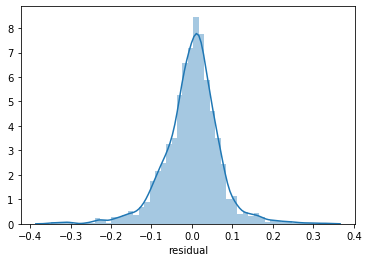

In [227]:
sns.distplot(app_data['residual'])

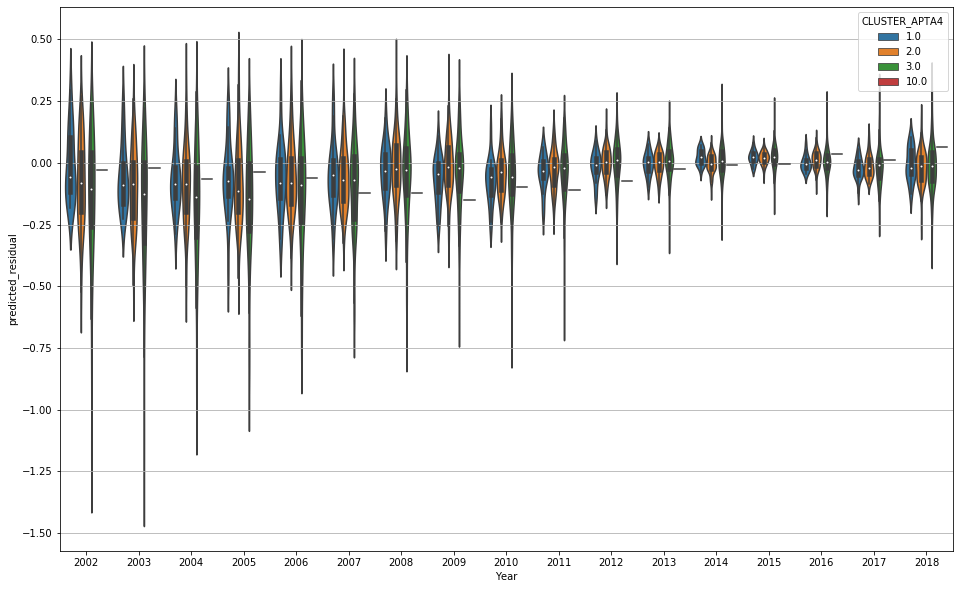

In [228]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="predicted_residual", hue="CLUSTER_APTA4", data=app_data[app_data['RAIL_FLAG']==0])

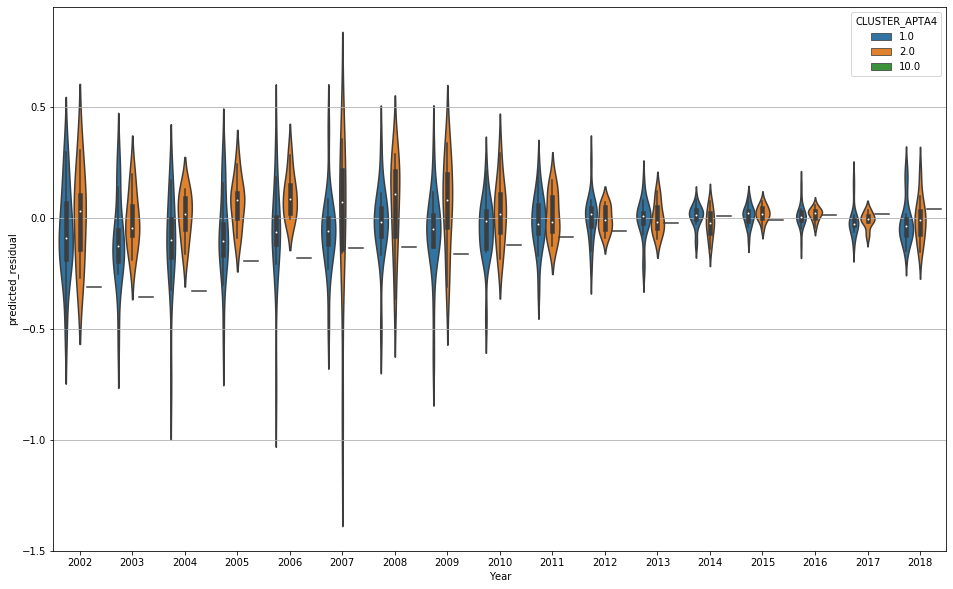

In [229]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="predicted_residual", hue="CLUSTER_APTA4", data=app_data[app_data['RAIL_FLAG']==1])

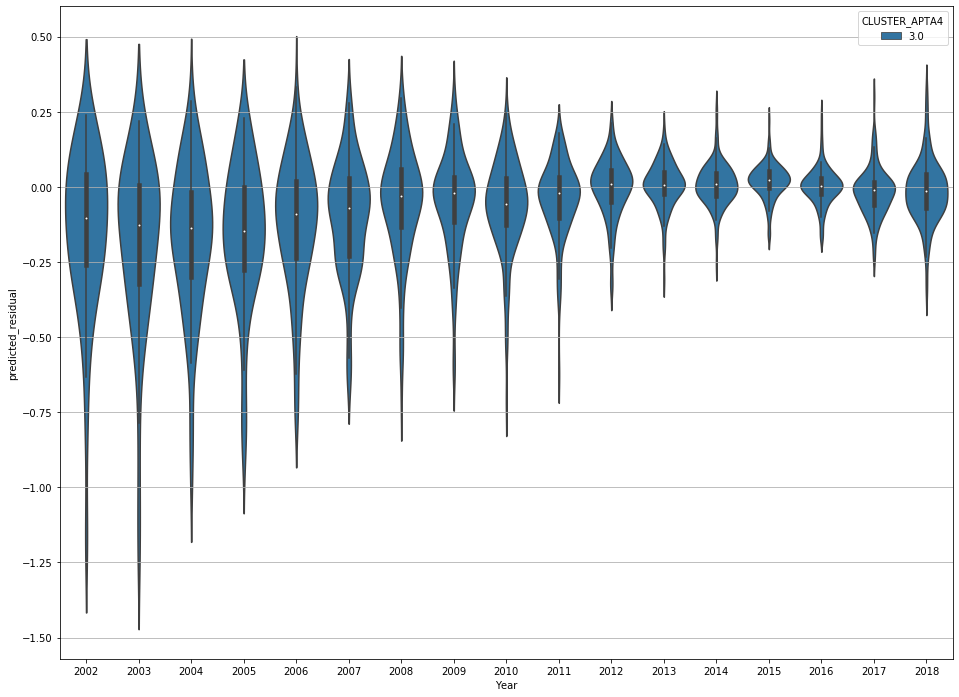

In [230]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="Year", y="predicted_residual", hue="CLUSTER_APTA4", data=app_data[app_data['CLUSTER_APTA4']==3])

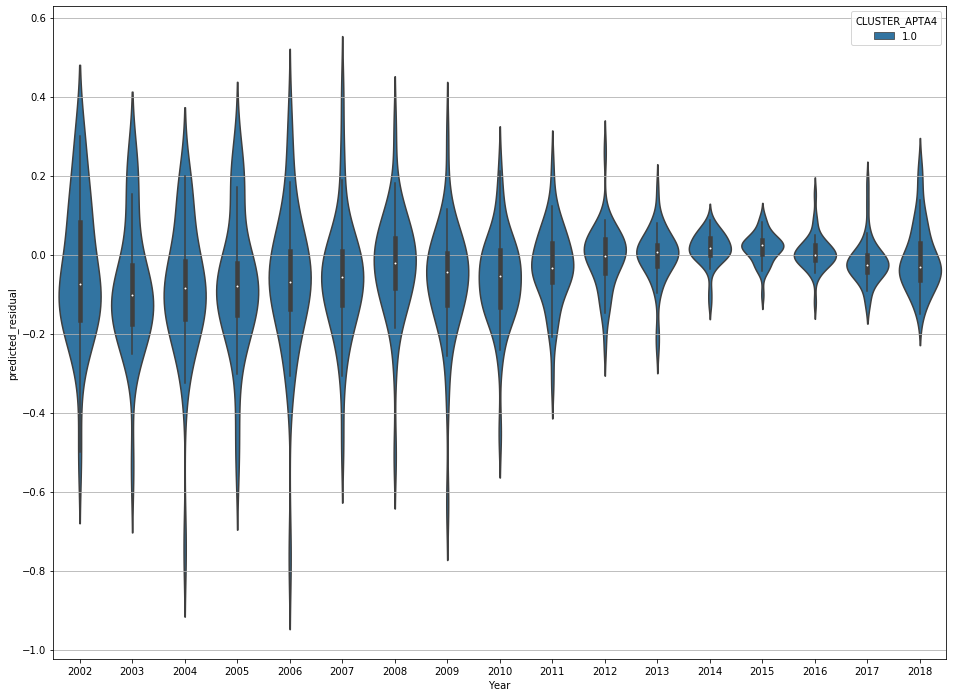

In [231]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="Year", y="predicted_residual", hue="CLUSTER_APTA4", data=app_data[app_data['CLUSTER_APTA4']==1])

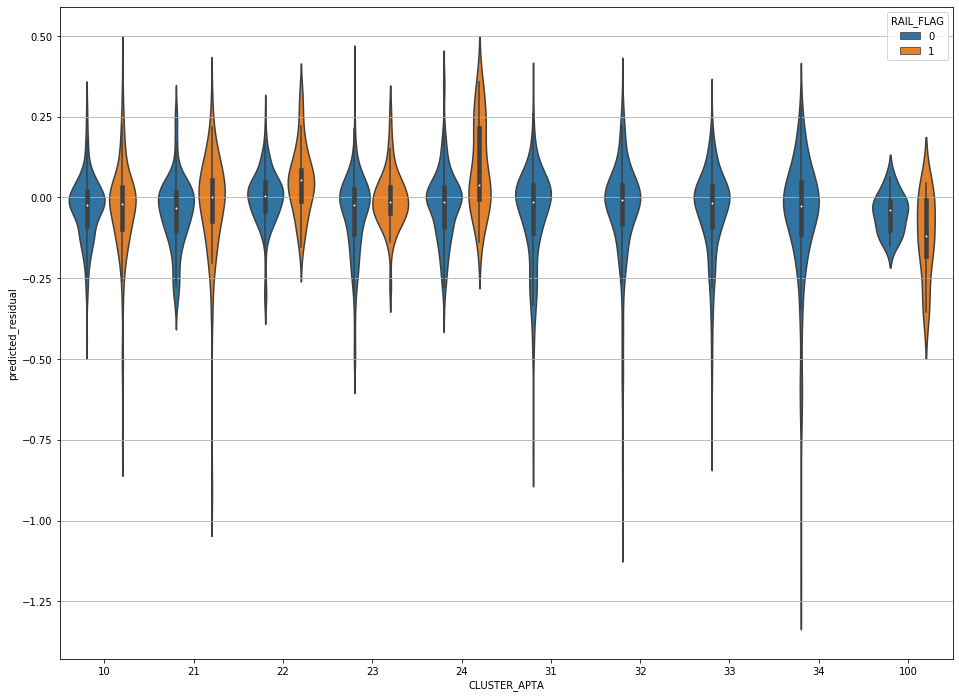

In [232]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="CLUSTER_APTA", y="predicted_residual", hue="RAIL_FLAG", data=app_data)

In [158]:
app_data['YEARS_SINCE_TNC'] =(app_data['YEARS_SINCE_TNC_BUS_NY'] 
                            + app_data['YEARS_SINCE_TNC_BUS_HI']
                            + app_data['YEARS_SINCE_TNC_BUS_MID']
                            + app_data['YEARS_SINCE_TNC_BUS_LOW']
                            + app_data['YEARS_SINCE_TNC_RAIL_NY']
                            + app_data['YEARS_SINCE_TNC_RAIL_HI']
                            + app_data['YEARS_SINCE_TNC_RAIL_MID']) 
                              

KeyError: 'YEARS_SINCE_TNC_BUS_NY'

In [ ]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="YEARS_SINCE_TNC", y="predicted_residual", hue="CLUSTER_APTA4", data=app_data[app_data['RAIL_FLAG']==0])


In [ ]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="YEARS_SINCE_TNC", 
               y="predicted_residual", 
               hue="CLUSTER_APTA4", 
               data=app_data[app_data['RAIL_FLAG']==1])


In [ ]:
df2 = df.reset_index()

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="YEARS_SINCE_TNC", hue="CLUSTER_APTA4", data=df2)

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="TNC_TRIPS_PER_CAPITA_CLUSTER", hue="CLUSTER_APTA4", data=df2)

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="TNC_TRIPS_PER_UPT_2012", hue="CLUSTER_APTA4", data=df2)

In [ ]:
df2 = app_data[['RAIL_FLAG',
               'Unknown_FAC', 
               'VRM_ADJ_log', 
               'VRM_ADJ_ratio', 
               'FARE_per_UPT_cleaned_2018_ratio', 
               'POP_EMP_ratio', 
               'GAS_PRICE_2018_ratio',
               'TOTAL_MED_INC_INDIV_2018_ratio',
               'PCT_HH_NO_VEH_diff',
               'JTW_HOME_PCT_diff'
              ]]
sns.PairGrid(df2, hue="RAIL_FLAG")

In [ ]:
df2 = app_data[['RAIL_FLAG', 
               'Unknown_FAC', 
               'YEARS_SINCE_TNC_BUS_NY_diff', 
               'YEARS_SINCE_TNC_BUS_HI_diff', 
               'YEARS_SINCE_TNC_BUS_MID_diff', 
               'YEARS_SINCE_TNC_BUS_LOW_diff', 
               'YEARS_SINCE_TNC_RAIL_NY_diff',
               'YEARS_SINCE_TNC_RAIL_HI_diff',
               'YEARS_SINCE_TNC_RAIL_MID_diff'
              ]]
sns.PairGrid(df2, hue="RAIL_FLAG")